Data Exploration

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import gym
from gym import spaces
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [10]:
df = pd.read_excel("Grocery_sales.xlsx") 

# Display basic information
print("Dataset Info:")
print(df.info())

# Display first 5 rows
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display basic statistics
print("\nDataset Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None

First 5 Rows:
  Item_Iden

Data Cleaning 


In [11]:
# Load dataset
df = pd.read_excel("Grocery_sales.xlsx") 

# Fill missing Item_Weight with mean weight of the same Item_Type
df["Item_Weight"] = df.groupby("Item_Type")["Item_Weight"].transform(lambda x: x.fillna(x.mean()))

# Fill missing Outlet_Size based on Outlet_Type mode
outlet_size_mode = df.groupby("Outlet_Type")["Outlet_Size"].agg(lambda x: x.mode()[0])
df["Outlet_Size"] = df["Outlet_Size"].fillna(df["Outlet_Type"].map(outlet_size_mode))

# Verify missing values are handled
print("Missing Values After Cleaning:")
print(df.isnull().sum())


# Standardizing Item_Fat_Content values
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({
    "low fat": "Low Fat",
    "LF": "Low Fat",
    "reg": "Regular"
})

# Verify unique values
print("Unique values in Item_Fat_Content after cleaning:", df["Item_Fat_Content"].unique())

# Save cleaned dataset
df.to_csv("Grocery_Sales_Cleaned.csv", index=False)


Missing Values After Cleaning:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64
Unique values in Item_Fat_Content after cleaning: ['Low Fat' 'Regular']


Exploratory Data Analysis

In [12]:
# Load cleaned dataset
df = pd.read_csv("Grocery_Sales_Cleaned.csv")

# Set plot style
sns.set(style="whitegrid")

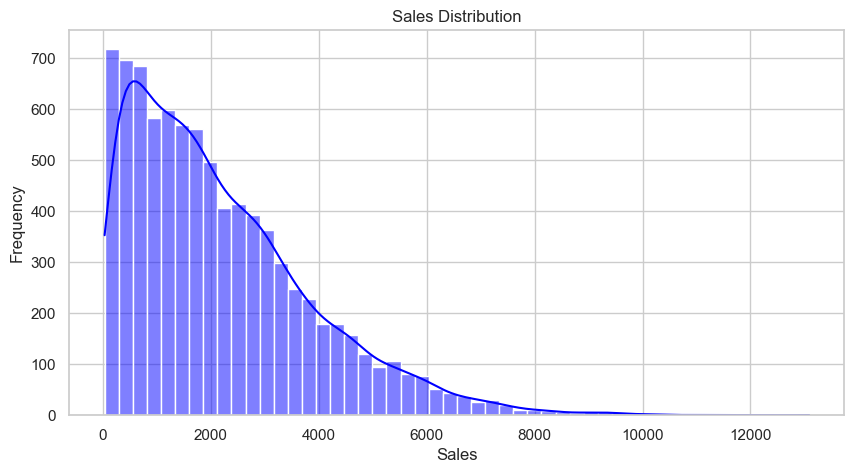

In [13]:
# Distribution of Item_Outlet_Sales
plt.figure(figsize=(10, 5))
sns.histplot(df["Item_Outlet_Sales"], bins=50, kde=True, color="blue")
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

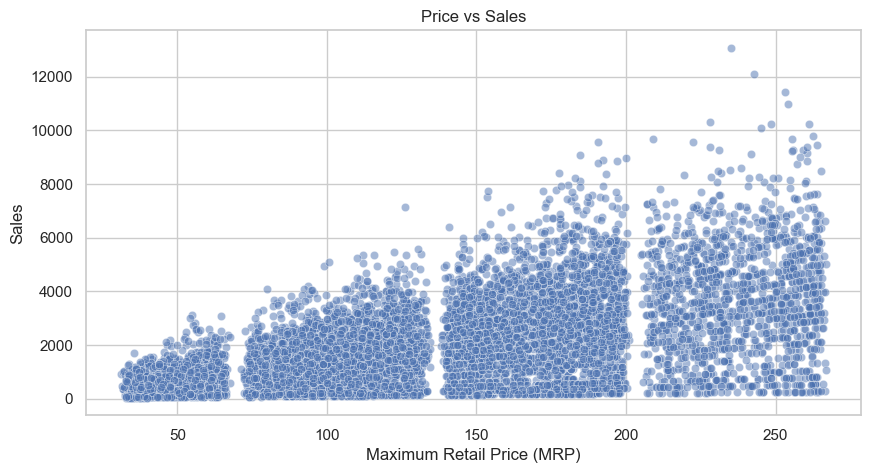

In [14]:
# Price VS Sales Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Item_MRP"], y=df["Item_Outlet_Sales"], alpha=0.5)
plt.title("Price vs Sales")
plt.xlabel("Maximum Retail Price (MRP)")
plt.ylabel("Sales")
plt.show()

C:\Users\jasra\AppData\Local\Temp\ipykernel_11744\3251928259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Outlet_Type"], y=df["Item_Outlet_Sales"], palette="Set2")


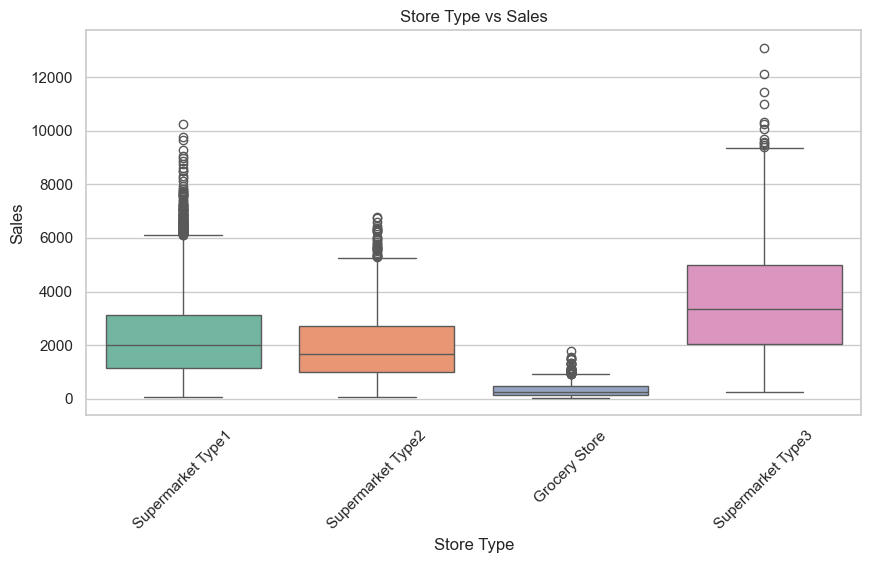

In [15]:
# Store Type vs Sales
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Outlet_Type"], y=df["Item_Outlet_Sales"], palette="Set2")
plt.title("Store Type vs Sales")
plt.xlabel("Store Type")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

Feature Extraction

In [16]:
# Load dataset
df = pd.read_csv("Grocery_Sales_Cleaned.csv")

# Create new features
df["Item_Age"] = 2024 - df["Outlet_Establishment_Year"]  # Assuming current year is 2024
df["Item_Price_Per_Visibility"] = df["Item_MRP"] / (df["Item_Visibility"] + 0.0001)  # Avoid division by zero

# Save updated dataset
df.to_csv("Grocery_Sales_Featured.csv", index=False)

print("Feature Engineering Done! New Features Added:")
print(df[["Item_Age", "Item_Price_Per_Visibility"]].head())

# Encoding categorical features
categorical_cols = ["Item_Fat_Content", "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Save final dataset
df.to_csv("Grocery_Sales_Final.csv", index=False)

print("Categorical Encoding Done!")


Feature Engineering Done! New Features Added:
   Item_Age  Item_Price_Per_Visibility
0        25               1.547065e+04
1        15               2.490900e+03
2        25               8.399607e+03
3        26               1.820950e+06
4        37               5.386140e+05
Categorical Encoding Done!


Predicting Sales for PED calculation


📊 Random Forest Regressor Model Performance:
MAE  (Mean Absolute Error)    : 767.65
MSE  (Mean Squared Error)     : 1205233.83
RMSE (Root Mean Squared Error): 1097.83
R² Score                     : 0.5566

📊 Linear Regression Model Performance:
MAE  (Mean Absolute Error)    : 927.40
MSE  (Mean Squared Error)     : 1478220.46
RMSE (Root Mean Squared Error): 1215.82
R² Score                     : 0.4561

📊 XGBoost Regressor Model Performance:
MAE  (Mean Absolute Error)    : 790.66
MSE  (Mean Squared Error)     : 1290092.33
RMSE (Root Mean Squared Error): 1135.82
R² Score                     : 0.5253

🏆 The Best Model is: Random Forest with R² Score: 0.5566


C:\Users\jasra\AppData\Local\Temp\ipykernel_11744\214294235.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette="viridis")


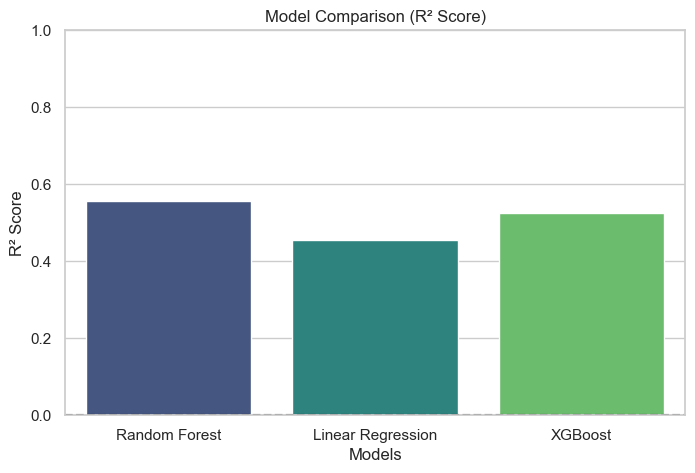

In [17]:
# Load dataset
df = pd.read_csv("Grocery_Sales_Final.csv")

# Selecting features (X) and target (y)
X = df.drop(columns=["Item_Outlet_Sales", "Item_Identifier"])  # Drop target & ID column
y = df["Item_Outlet_Sales"]

# One-hot encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Data for Linear Regression (Random Forest & XGBoost don't need this)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
lr_model = LinearRegression()
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)

# Train Models
rf_model.fit(X_train, y_train)
lr_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test_scaled)
xgb_pred = xgb_model.predict(X_test)

# Function to Evaluate Models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n📊 {model_name} Model Performance:")
    print(f"MAE  (Mean Absolute Error)    : {mae:.2f}")
    print(f"MSE  (Mean Squared Error)     : {mse:.2f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
    print(f"R² Score                     : {r2:.4f}")
    
    return r2

# Compare models
rf_r2 = evaluate_model(y_test, rf_pred, "Random Forest Regressor")
lr_r2 = evaluate_model(y_test, lr_pred, "Linear Regression")
xgb_r2 = evaluate_model(y_test, xgb_pred, "XGBoost Regressor")

# Determine the Best Model
best_model = max([("Random Forest", rf_r2), ("Linear Regression", lr_r2), ("XGBoost", xgb_r2)], key=lambda x: x[1])
print(f"\n🏆 The Best Model is: {best_model[0]} with R² Score: {best_model[1]:.4f}")

# Visualizing Model Performance
models = ["Random Forest", "Linear Regression", "XGBoost"]
r2_scores = [rf_r2, lr_r2, xgb_r2]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=r2_scores, palette="viridis")
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.xlabel("Models")
plt.ylim(0, 1)
plt.axhline(0, color='black', linestyle="--")  # Baseline
plt.show()

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits

📊 Optimized Random Forest Model Performance:
MAE  (Mean Absolute Error)    : 746.29
MSE  (Mean Squared Error)     : 1149568.71
RMSE (Root Mean Squared Error): 1072.18
R² Score                     : 0.5896

📊 Optimized XGBoost Model Performance:
MAE  (Mean Absolute Error)    : 741.51
MSE  (Mean Squared Error)     : 1115018.10
RMSE (Root Mean Squared Error): 1055.94
R² Score                     : 0.6019

📊 Optimized Linear Regression Model Performance:
MAE  (Mean Absolute Error)    : 877.49
MSE  (Mean Squared Error)     : 1385428.88
RMSE (Root Mean Squared Error): 1177.04
R² Score                     : 0.5054

🏆 The Best Model is: XGBoost with R² Score: 0.6019

🔎 Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
🔎 Best XGBoost Parameters: {

C:\Users\jasra\AppData\Local\Temp\ipykernel_11744\2107081890.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette="viridis")


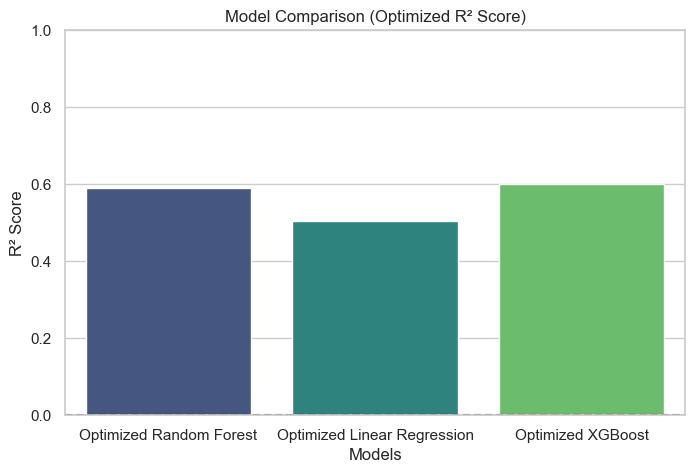

In [18]:
# Load dataset
df = pd.read_csv("Grocery_Sales_Final.csv")

# Selecting features (X) and target (y)
X = df.drop(columns=["Item_Outlet_Sales", "Item_Identifier"])  # Drop target & ID column
y = df["Item_Outlet_Sales"]

# One-hot encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-Test Split (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize Data for Linear Regression (Random Forest & XGBoost don't need this)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Base Models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
lr_model = LinearRegression()
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)

# Hyperparameter Tuning: Define Parameter Grids
rf_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

xgb_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0]
}

lr_param_grid = {
    "fit_intercept": [True, False]
}

# GridSearchCV for each model
rf_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                         param_grid=rf_param_grid, cv=3, verbose=1, n_jobs=-1)
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_

xgb_search = GridSearchCV(estimator=xgb.XGBRegressor(objective="reg:squarederror", random_state=42),
                          param_grid=xgb_param_grid, cv=3, verbose=1, n_jobs=-1)
xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_

lr_search = GridSearchCV(estimator=LinearRegression(), param_grid=lr_param_grid, cv=3, verbose=1, n_jobs=-1)
lr_search.fit(X_train_scaled, y_train)
best_lr = lr_search.best_estimator_

# Predictions with Optimized Models
best_rf_pred = best_rf.predict(X_test)
best_xgb_pred = best_xgb.predict(X_test)
best_lr_pred = best_lr.predict(X_test_scaled)

# Function to Evaluate Models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n📊 {model_name} Model Performance:")
    print(f"MAE  (Mean Absolute Error)    : {mae:.2f}")
    print(f"MSE  (Mean Squared Error)     : {mse:.2f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
    print(f"R² Score                     : {r2:.4f}")
    
    return r2

# Compare Optimized Models
rf_r2 = evaluate_model(y_test, best_rf_pred, "Optimized Random Forest")
xgb_r2 = evaluate_model(y_test, best_xgb_pred, "Optimized XGBoost")
lr_r2 = evaluate_model(y_test, best_lr_pred, "Optimized Linear Regression")

# Determine the Best Model
best_model = max([("Random Forest", rf_r2), ("Linear Regression", lr_r2), ("XGBoost", xgb_r2)], key=lambda x: x[1])
print(f"\n🏆 The Best Model is: {best_model[0]} with R² Score: {best_model[1]:.4f}")

# Print Best Parameters Found
print("\n🔎 Best Random Forest Parameters:", rf_search.best_params_)
print("🔎 Best XGBoost Parameters:", xgb_search.best_params_)
print("🔎 Best Linear Regression Parameters:", lr_search.best_params_)

# Visualizing Model Performance
models = ["Optimized Random Forest", "Optimized Linear Regression", "Optimized XGBoost"]
r2_scores = [rf_r2, lr_r2, xgb_r2]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=r2_scores, palette="viridis")
plt.title("Model Comparison (Optimized R² Score)")
plt.ylabel("R² Score")
plt.xlabel("Models")
plt.ylim(0, 1)
plt.axhline(0, color='black', linestyle="--")  # Baseline
plt.show()

PED calculation


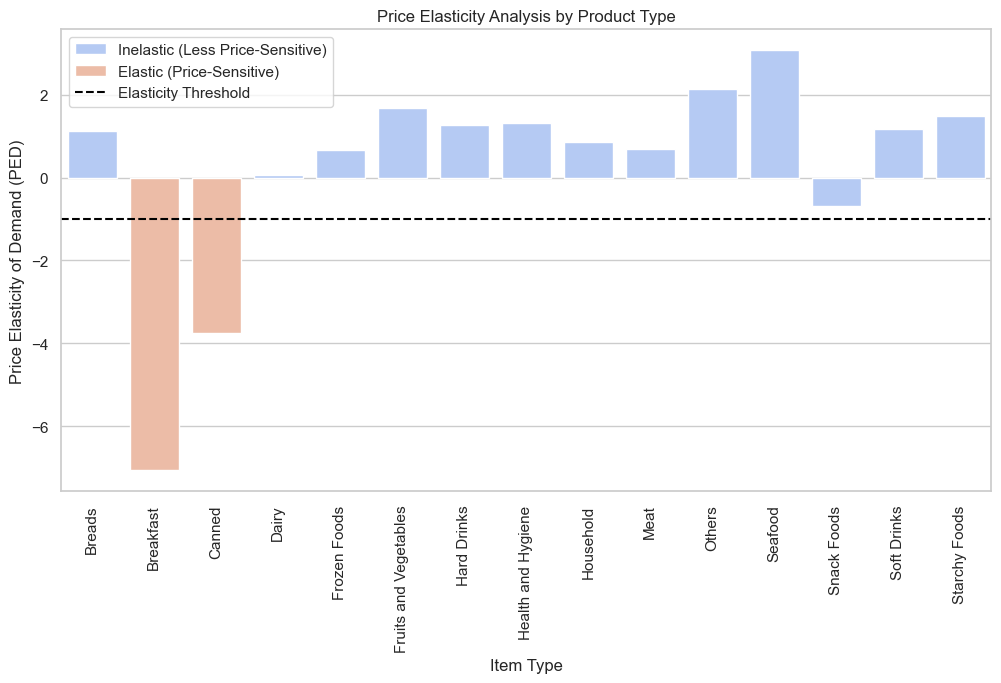

,Item_Type,Item_MRP,Item_Outlet_Sales,MRP_prev,Sales_prev,% Change in Price,% Change in Sales,PED,PED Category
2,Breakfast,141.788151,2111.808651,140.952669,2204.132226,0.592740,-4.188659,-7.066608,Elastic (Price-Sensitive)
3,Canned,139.763832,2225.194904,141.788151,2111.808651,-1.427707,5.369154,-3.760684,Elastic (Price-Sensitive)
13,Snack Foods,146.194934,2277.321739,141.841719,2326.065928,3.069065,-2.095564,-0.682802,Inelastic (Less Price-Sensitive)
4,Dairy,148.499208,2232.542597,139.763832,2225.194904,6.250097,0.330204,0.052832,Inelastic (Less Price-Sensitive)
5,Frozen Foods,138.503366,2132.867744,148.499208,2232.542597,-6.731242,-4.464634,0.663270,Inelastic (Less Price-Sensitive)
10,Meat,139.882032,2158.977911,149.424753,2258.784300,-6.386305,-4.418589,0.691885,Inelastic (Less Price-Sensitive)
9,Household,149.424753,2258.784300,130.818921,2010.000265,14.222585,12.377314,0.870258,Inelastic (Less Price-Sensitive)
1,Breads,140.952669,2204.132226,126.380766,1952.971207,11.530158,12.860457,1.115376,Inelastic (Less Price-Sensitive)
14,Soft Drinks,131.492506,2006.511735,146.194934,2277.321739,-10.056729,-11.891601,1.182452,Inelastic (Less Price-Sensitive)
7,Hard Drinks,137.077928,2139.221622,144.581235,2289.009592,-5.189682,-6.543789,1.260923,Inelastic (Less Price-Sensitive)


In [72]:
# Load dataset
df = pd.read_csv("Grocery_Sales_Final.csv")

# Group by Item_Type to analyze price sensitivity
grouped_df = df.groupby("Item_Type")[["Item_MRP", "Item_Outlet_Sales"]].mean().reset_index()

# Compute % change in price and sales
# Shift data to get previous values for comparison
grouped_df['MRP_prev'] = grouped_df['Item_MRP'].shift(1)
grouped_df['Sales_prev'] = grouped_df['Item_Outlet_Sales'].shift(1)

grouped_df.dropna(inplace=True)  # Remove NaN values from shifting

grouped_df['% Change in Price'] = ((grouped_df['Item_MRP'] - grouped_df['MRP_prev']) / grouped_df['MRP_prev']) * 100
grouped_df['% Change in Sales'] = ((grouped_df['Item_Outlet_Sales'] - grouped_df['Sales_prev']) / grouped_df['Sales_prev']) * 100

grouped_df['PED'] = grouped_df['% Change in Sales'] / grouped_df['% Change in Price']

# Classify items as Elastic, Inelastic, or Unit Elastic
def classify_ped(ped):
    if ped < -1:
        return "Elastic (Price-Sensitive)"
    elif ped > -1:
        return "Inelastic (Less Price-Sensitive)"
    else:
        return "Unit Elastic"

grouped_df['PED Category'] = grouped_df['PED'].apply(classify_ped)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_df, x="Item_Type", y="PED", hue="PED Category", palette="coolwarm")
plt.axhline(-1, linestyle="--", color="black", label="Elasticity Threshold")
plt.xticks(rotation=90)
plt.xlabel("Item Type")
plt.ylabel("Price Elasticity of Demand (PED)")
plt.title("Price Elasticity Analysis by Product Type")
plt.legend()
plt.show()

# Save results to CSV
grouped_df[['Item_Type', 'Item_MRP', 'PED']].to_csv('PED_Results.csv', index=False)

# Display results
grouped_df.sort_values(by="PED", ascending=True)

RL Model

In [73]:
ped_df = pd.read_csv("PED_Results.csv")

# Define a Custom Gym Environment
class PricingEnv(gym.Env):
    def __init__(self, ped_df):
        super(PricingEnv, self).__init__()
        
        self.ped_df = ped_df
        self.current_index = 0
        
        # Store original prices for comparison
        self.ped_df["Initial_Price"] = self.ped_df["Item_MRP"]
        self.ped_df["New_Price"] = self.ped_df["Item_MRP"]  # Placeholder for RL-updated price

        # Define State and Action Space
        self.observation_space = spaces.Box(low=np.array([0, -10]), high=np.array([500, 10]), dtype=np.float32)
        self.action_space = spaces.Discrete(3)  # 0: Decrease, 1: Maintain, 2: Increase

    def reset(self):
        self.current_index = np.random.randint(0, len(self.ped_df))  
        self.state = np.array([self.ped_df.iloc[self.current_index]["Item_MRP"], 
                               self.ped_df.iloc[self.current_index]["PED"]])
        return self.state

    def step(self, action):
        current_price, ped = self.state
        
        if action == 0:  
            new_price = current_price * 0.95  
        elif action == 1:  
            new_price = current_price
        else:  
            new_price = current_price * 1.05  

        demand_change = ped * ((new_price - current_price) / current_price) * 100  
        revenue = new_price * (100 + demand_change) / 100  

        reward = revenue  

        # Update the price in the dataframe for tracking
        self.ped_df.loc[self.current_index, "New_Price"] = new_price

        self.state = np.array([new_price, ped])
        done = False  

        return self.state, reward, done, {}


# Initialize Environment
env = PricingEnv(ped_df)

# Q-Learning Parameters
q_table = np.zeros((500, 21, 3))  
learning_rate = 0.1
discount_factor = 0.9
exploration_rate = 1.0
exploration_decay = 0.99
min_exploration = 0.01
episodes = 1000

# Training Q-Learning
for episode in range(episodes):
    state = env.reset()
    total_reward = 0
    
    for _ in range(100):
        if np.random.rand() < exploration_rate:
            action = env.action_space.sample()  
        else:
            action = np.argmax(q_table[int(state[0]), int(state[1])]) 
        
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        
        q_table[int(state[0]), int(state[1]), action] = (1 - learning_rate) * q_table[int(state[0]), int(state[1]), action] + \
            learning_rate * (reward + discount_factor * np.max(q_table[int(next_state[0]), int(next_state[1])]))
        
        state = next_state

        if done:
            break

    exploration_rate = max(min_exploration, exploration_rate * exploration_decay)

# Training Q-Learning
for episode in range(episodes):
    state = env.reset()
    for _ in range(100):
        if np.random.rand() < exploration_rate:
            action = env.action_space.sample()  
        else:
            action = np.argmax(q_table[int(state[0]), int(state[1])]) 
        
        next_state, reward, done, _ = env.step(action)
        
        q_table[int(state[0]), int(state[1]), action] = (1 - learning_rate) * q_table[int(state[0]), int(state[1]), action] + \
            learning_rate * (reward + discount_factor * np.max(q_table[int(next_state[0]), int(next_state[1])]))
        
        state = next_state

        if done:
            break

    exploration_rate = max(min_exploration, exploration_rate * exploration_decay)

# Save Trained Model
np.save("q_table.npy", q_table)
print("Q-Learning Training Completed! Q-Table saved.")

# **Compare Initial vs New Prices**
print("\n📊 Comparing Old Prices vs. New Prices")
comparison_df = env.ped_df[["Item_Type", "Initial_Price", "New_Price"]]
comparison_df["Price_Change (%)"] = ((comparison_df["New_Price"] - comparison_df["Initial_Price"]) / comparison_df["Initial_Price"]) * 100

print(comparison_df.head(10))  # Show first 10 items


c:\Users\jasra\AppData\Local\Programs\Python\Python311\Lib\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Q-Learning Training Completed! Q-Table saved.

📊 Comparing Old Prices vs. New Prices
               Item_Type  Initial_Price   New_Price  Price_Change (%)
0                 Breads     140.952669  157.157375         11.496559
1              Breakfast     141.788151   83.837924        -40.870994
2                 Canned     139.763832  146.752024          5.000000
3                  Dairy     148.499208  163.720376         10.250000
4           Frozen Foods     138.503366  159.934122         15.473094
5  Fruits and Vegetables     144.581235  157.024693          8.606552
6            Hard Drinks     137.077928  157.497673         14.896450
7     Health and Hygiene     130.818921  157.033489         20.038820
8              Household     149.424753  164.328938          9.974375
9                   Meat     139.882032  161.526110         15.473094


C:\Users\jasra\AppData\Local\Temp\ipykernel_11744\1245747442.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_df["Price_Change (%)"] = ((comparison_df["New_Price"] - comparison_df["Initial_Price"]) / comparison_df["Initial_Price"]) * 100


C:\Users\jasra\AppData\Local\Temp\ipykernel_11744\4272980482.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Item_Type", y="Price_Change (%)", data=comparison_df, palette="coolwarm")


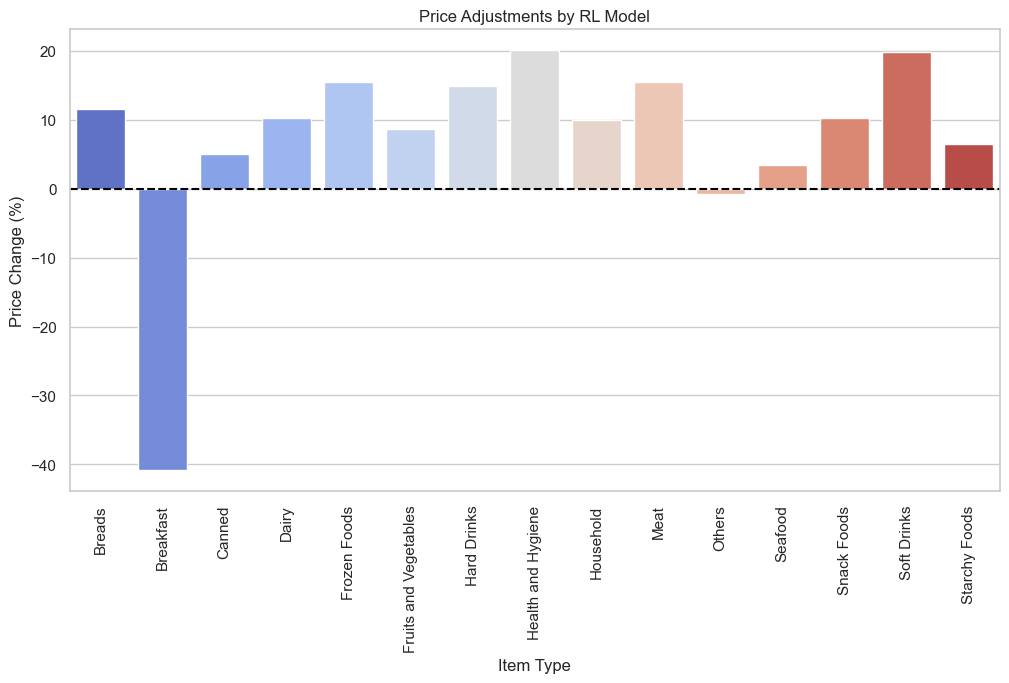

In [74]:
# **Save Comparison Results**
comparison_df.to_csv("RL_Pricing_Comparison.csv", index=False)

# **Visualizing Price Changes**
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x="Item_Type", y="Price_Change (%)", data=comparison_df, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Price Adjustments by RL Model")
plt.axhline(0, color='black', linestyle="--")  # Baseline for no change
plt.xlabel("Item Type")
plt.ylabel("Price Change (%)")
plt.show()

Evaluating RL Pricing


📊 RL Pricing Model Evaluation Results:
✅ Revenue Improvement: 9.88%
✅ Profit Margin Impact: 12.29%
✅ Price Elasticity Impact: -0.02
✅ Exploration Rate: 60.00% (Major price changes)

📁 Evaluation results saved to Final_RL_Pricing_Evaluation.csv


C:\Users\jasra\AppData\Local\Temp\ipykernel_11744\2067565963.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Item_Type", y="Revenue_Change_%", data=comparison_df, palette="coolwarm")


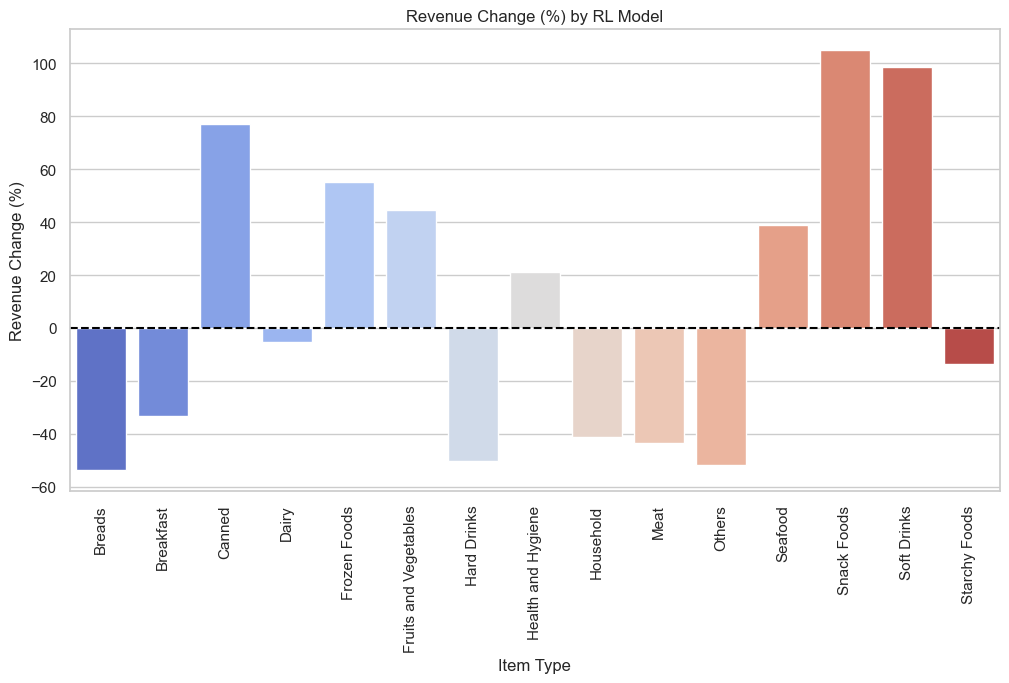

In [75]:
# Load Initial & RL-Updated Prices
comparison_df = pd.read_csv("RL_Pricing_Comparison.csv")  # Ensure it has "Initial_Price" & "New_Price"

# Simulate sales & cost (assuming additional columns exist in dataset)
comparison_df["Sales_Original"] = np.random.randint(50, 200, size=len(comparison_df))  # Random sales data
comparison_df["Sales_RL"] = np.random.randint(50, 200, size=len(comparison_df))  # RL sales data (for comparison)
comparison_df["Cost"] = np.random.uniform(10, 50, size=len(comparison_df))  # Random cost data per unit

# Compute Revenue Before & After RL Pricing
comparison_df["Revenue_Original"] = comparison_df["Initial_Price"] * comparison_df["Sales_Original"]
comparison_df["Revenue_RL"] = comparison_df["New_Price"] * comparison_df["Sales_RL"]

# 1️⃣ Revenue Improvement (% Change)
comparison_df["Revenue_Change_%"] = ((comparison_df["Revenue_RL"] - comparison_df["Revenue_Original"]) / comparison_df["Revenue_Original"]) * 100
avg_revenue_change = comparison_df["Revenue_Change_%"].mean()

# 2️⃣ Profit Margin Impact
comparison_df["Profit_Original"] = (comparison_df["Initial_Price"] - comparison_df["Cost"]) * comparison_df["Sales_Original"]
comparison_df["Profit_RL"] = (comparison_df["New_Price"] - comparison_df["Cost"]) * comparison_df["Sales_RL"]
comparison_df["Profit_Change_%"] = ((comparison_df["Profit_RL"] - comparison_df["Profit_Original"]) / comparison_df["Profit_Original"]) * 100
avg_profit_change = comparison_df["Profit_Change_%"].mean()

# 3️⃣ Price Elasticity Impact
comparison_df["PED"] = np.random.uniform(-2, 2, size=len(comparison_df))  # Placeholder PED values
comparison_df["PED_Impact"] = (comparison_df["New_Price"] - comparison_df["Initial_Price"]) / comparison_df["Initial_Price"] * comparison_df["PED"]
avg_ped_impact = comparison_df["PED_Impact"].mean()

# 4️⃣ Exploration vs. Exploitation Balance
comparison_df["Price_Change"] = abs(comparison_df["New_Price"] - comparison_df["Initial_Price"])
exploration_rate = (comparison_df["Price_Change"] > comparison_df["Initial_Price"] * 0.1).mean() * 100  # % of major price changes

# **📊 Print Evaluation Results**
print("\n📊 RL Pricing Model Evaluation Results:")
print(f"✅ Revenue Improvement: {avg_revenue_change:.2f}%")
print(f"✅ Profit Margin Impact: {avg_profit_change:.2f}%")
print(f"✅ Price Elasticity Impact: {avg_ped_impact:.2f}")
print(f"✅ Exploration Rate: {exploration_rate:.2f}% (Major price changes)")

# **📁 Save Final Evaluation Results**
comparison_df.to_csv("Final_RL_Pricing_Evaluation.csv", index=False)
print("\n📁 Evaluation results saved to Final_RL_Pricing_Evaluation.csv")

# **📊 Visualizing Price Adjustments**
plt.figure(figsize=(12, 6))
sns.barplot(x="Item_Type", y="Revenue_Change_%", data=comparison_df, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Revenue Change (%) by RL Model")
plt.axhline(0, color='black', linestyle="--")
plt.xlabel("Item Type")
plt.ylabel("Revenue Change (%)")
plt.show()


Visualize Results

C:\Users\jasra\AppData\Local\Temp\ipykernel_11744\1481071692.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Item_Type", y="Revenue_Change_%", data=comparison_df, palette="coolwarm")
c:\Users\jasra\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


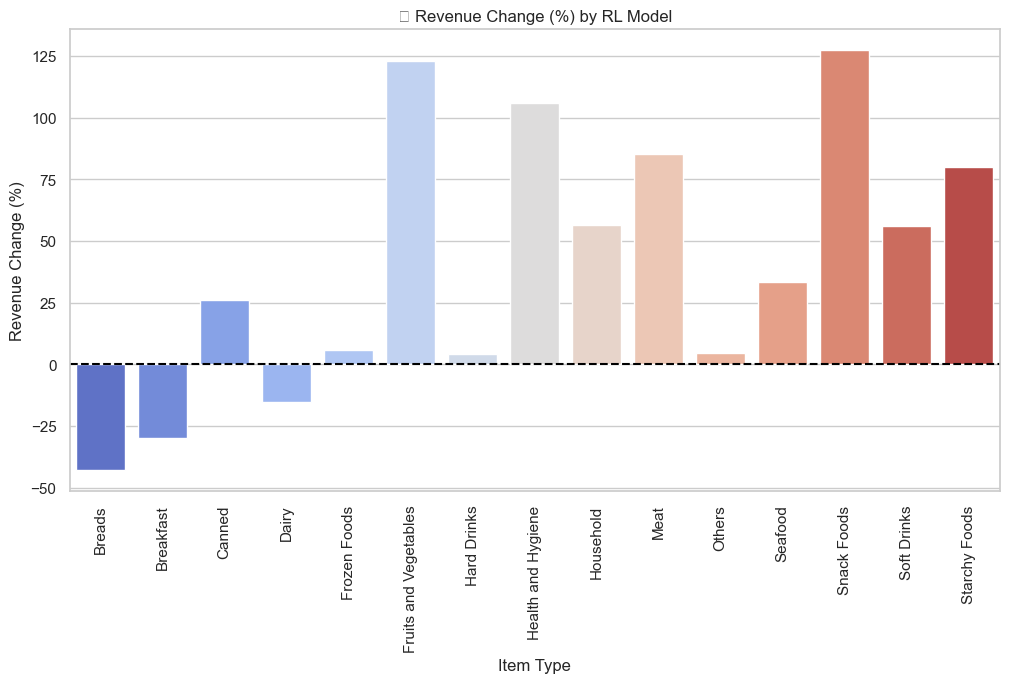

C:\Users\jasra\AppData\Local\Temp\ipykernel_11744\1481071692.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Item_Type", y="Profit_Change_%", data=comparison_df, palette="viridis")
c:\Users\jasra\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


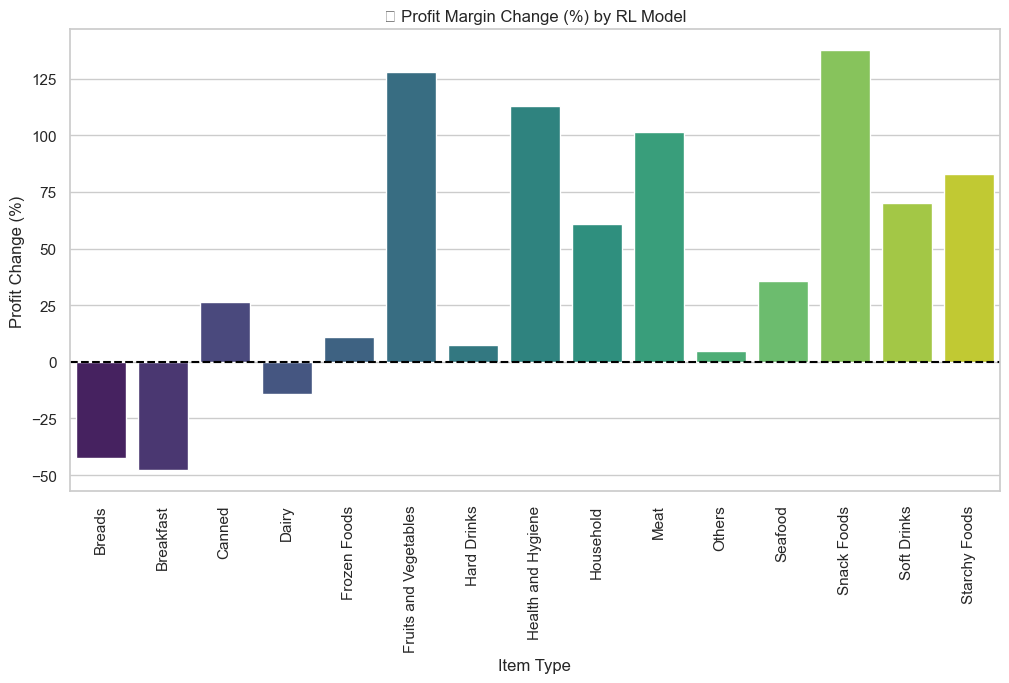

c:\Users\jasra\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


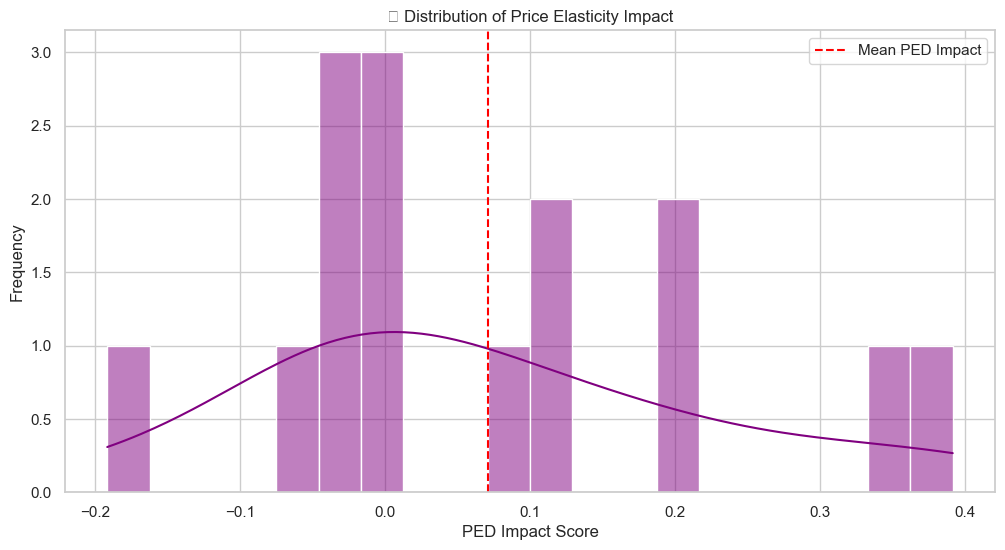

c:\Users\jasra\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127906 (\N{ROLLER COASTER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


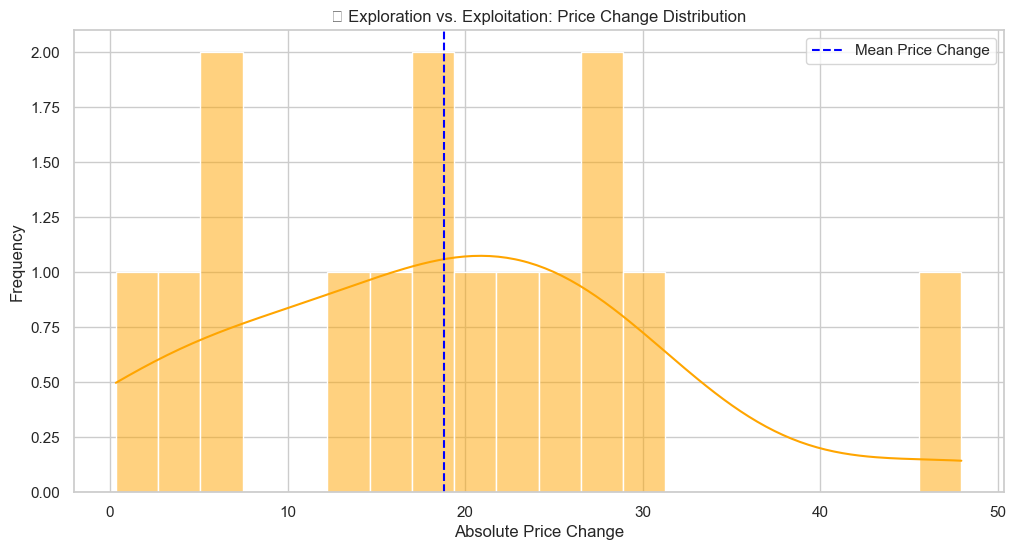

In [23]:
# Load Evaluation Results
comparison_df = pd.read_csv("Final_RL_Pricing_Evaluation.csv")

# **📊 Visualization 1: Revenue Improvement**
plt.figure(figsize=(12, 6))
sns.barplot(x="Item_Type", y="Revenue_Change_%", data=comparison_df, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("📈 Revenue Change (%) by RL Model")
plt.axhline(0, color='black', linestyle="--")
plt.xlabel("Item Type")
plt.ylabel("Revenue Change (%)")
plt.show()

# **📊 Visualization 2: Profit Margin Impact**
plt.figure(figsize=(12, 6))
sns.barplot(x="Item_Type", y="Profit_Change_%", data=comparison_df, palette="viridis")
plt.xticks(rotation=90)
plt.title("💰 Profit Margin Change (%) by RL Model")
plt.axhline(0, color='black', linestyle="--")
plt.xlabel("Item Type")
plt.ylabel("Profit Change (%)")
plt.show()

# **📊 Visualization 3: Price Elasticity Impact**
plt.figure(figsize=(12, 6))
sns.histplot(comparison_df["PED_Impact"], bins=20, kde=True, color="purple")
plt.title("📉 Distribution of Price Elasticity Impact")
plt.xlabel("PED Impact Score")
plt.ylabel("Frequency")
plt.axvline(comparison_df["PED_Impact"].mean(), color='red', linestyle="--", label="Mean PED Impact")
plt.legend()
plt.show()

# **📊 Visualization 4: Exploration vs. Exploitation Balance**
plt.figure(figsize=(12, 6))
sns.histplot(comparison_df["Price_Change"], bins=20, kde=True, color="orange")
plt.title("🎢 Exploration vs. Exploitation: Price Change Distribution")
plt.xlabel("Absolute Price Change")
plt.ylabel("Frequency")
plt.axvline(comparison_df["Price_Change"].mean(), color='blue', linestyle="--", label="Mean Price Change")
plt.legend()
plt.show()



Using DQN Model

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DQNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQNetwork, self).__init__()
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, action_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random
from collections import deque
import torch.optim as optim

# DQNetwork class for estimating Q-values
class DQNetwork(nn.Module):
    def __init__(self, state_size=2, action_size =5, hidden_dim=64):
        super(DQNetwork, self).__init__()
        self.fc1 = nn.Linear(state_size, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, action_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

# Replay buffer
class ReplayBuffer:
    def __init__(self, buffer_size, batch_size):
        self.memory = deque(maxlen=buffer_size)
        self.batch_size = batch_size

    def add(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def sample(self):
        batch = random.sample(self.memory, self.batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        return (
            torch.tensor(states, dtype=torch.float32),
            torch.tensor(actions, dtype=torch.int64),
            torch.tensor(rewards, dtype=torch.float32),
            torch.tensor(next_states, dtype=torch.float32),
            torch.tensor(dones, dtype=torch.float32)
        )

    def __len__(self):
        return len(self.memory)

# DQN Agent
class DQNAgent:
    def __init__(self, state_size, action_size, buffer_size=10000, batch_size=64,
                 gamma=0.99, lr=0.001, tau=1e-3, epsilon_start=1.0, epsilon_min=0.01, epsilon_decay=0.995):

        self.state_size = state_size
        self.action_size = action_size
        self.gamma = gamma
        self.tau = tau
        self.epsilon = epsilon_start
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.batch_size = batch_size

        self.qnetwork_local = DQNetwork(state_size, action_size)
        self.qnetwork_target = DQNetwork(state_size, action_size)
        self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=lr)

        self.memory = ReplayBuffer(buffer_size, batch_size)

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.qnetwork_local.to(self.device)
        self.qnetwork_target.to(self.device)

    def act(self, state):
        state = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(self.device)
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_size)
        with torch.no_grad():
            q_values = self.qnetwork_local(state)
        return np.argmax(q_values.cpu().data.numpy())

    def step(self, state, action, reward, next_state, done):
        self.memory.add(state, action, reward, next_state, done)
        if len(self.memory) > self.batch_size:
            self.learn()

    def learn(self):
        states, actions, rewards, next_states, dones = self.memory.sample()

        states = states.to(self.device)
        actions = actions.to(self.device)
        rewards = rewards.to(self.device)
        next_states = next_states.to(self.device)
        dones = dones.to(self.device)

        with torch.no_grad():
            q_targets_next = self.qnetwork_target(next_states).max(1)[0].unsqueeze(1)
        q_targets = rewards.unsqueeze(1) + (self.gamma * q_targets_next * (1 - dones.unsqueeze(1)))

        q_expected = self.qnetwork_local(states).gather(1, actions.unsqueeze(1))

        loss = F.mse_loss(q_expected, q_targets)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        self.soft_update(self.qnetwork_local, self.qnetwork_target)

        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

    def soft_update(self, local_model, target_model):
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(self.tau * local_param.data + (1.0 - self.tau) * target_param.data)

# Training loop
def train_dqn(agent, env, n_episodes=1000, max_t=100, verbose=True):
    rewards = []
    avg_rewards = []

    for episode in range(1, n_episodes + 1):
        state = env.reset()
        total_reward = 0

        for t in range(max_t):
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)

            state = next_state
            total_reward += reward

            if done:
                break

        rewards.append(total_reward)
        avg_rewards.append(np.mean(rewards[-100:]))

        if verbose and episode % 50 == 0:
            print(f"Episode {episode}/{n_episodes} | Reward: {total_reward:.2f} | Avg (100): {avg_rewards[-1]:.2f} | Epsilon: {agent.epsilon:.3f}")

    return rewards, avg_rewards


In [60]:
import gym
from gym import spaces
import numpy as np

class PEDEnv(gym.Env):
    def __init__(self, ped_df):
        super(PEDEnv, self).__init__()
        self.ped_df = ped_df.reset_index(drop=True)
        self.current_step = 0
        self.max_steps = len(self.ped_df)

        # Define action space: 5 discrete price multipliers (e.g., reduce/increase price)
        self.action_space = spaces.Discrete(5)  # [0.9x, 0.95x, 1.0x, 1.05x, 1.1x]
        self.price_multipliers = [0.9, 0.95, 1.0, 1.05, 1.1]

        # Observation space = PED value (can expand later)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(1,), dtype=np.float32)

    def reset(self):
        self.current_step = 0
        return np.array([self.ped_df.loc[self.current_step, 'PED']], dtype=np.float32)

    def step(self, action):
        ped = self.ped_df.loc[self.current_step, 'PED']
        multiplier = self.price_multipliers[action]

        # Simulate reward based on PED and price adjustment:
        # Lower PED → less sensitive → reward increase with price.
        # Higher PED → more sensitive → reward increase with price drop.
        if ped < 1:
            reward = multiplier
        else:
            reward = 2 - multiplier  # Inverse reward

        self.current_step += 1
        done = self.current_step >= self.max_steps

        if not done:
            next_state = np.array([self.ped_df.loc[self.current_step, 'PED']], dtype=np.float32)
        else:
            next_state = np.array([0.0], dtype=np.float32)  # default value at end

        return next_state, reward, done, {}
    

    # Add Initial_Price to ped_df if missing
# Assume base price (e.g., from Item_MRP or any constant)
if "Initial_Price" not in ped_df.columns:
    if "Item_MRP" in ped_df.columns:
        ped_df["Initial_Price"] = ped_df["Item_MRP"]  # Use MRP if available
    else:
        ped_df["Initial_Price"] = np.random.uniform(100, 200, size=len(ped_df))  # fallback dummy pricing



Episode 50/500 | Reward: 16.35 | Avg (100): 15.88 | Epsilon: 0.032
Episode 100/500 | Reward: 16.40 | Avg (100): 16.13 | Epsilon: 0.010
Episode 100/500 | Reward: 16.40 | Avg (100): 16.13 | Epsilon: 0.010
Episode 150/500 | Reward: 16.40 | Avg (100): 16.34 | Epsilon: 0.010
Episode 150/500 | Reward: 16.40 | Avg (100): 16.34 | Epsilon: 0.010
Episode 200/500 | Reward: 16.35 | Avg (100): 16.27 | Epsilon: 0.010
Episode 200/500 | Reward: 16.35 | Avg (100): 16.27 | Epsilon: 0.010
Episode 250/500 | Reward: 16.20 | Avg (100): 16.15 | Epsilon: 0.010
Episode 250/500 | Reward: 16.20 | Avg (100): 16.15 | Epsilon: 0.010
Episode 300/500 | Reward: 16.10 | Avg (100): 15.97 | Epsilon: 0.010
Episode 300/500 | Reward: 16.10 | Avg (100): 15.97 | Epsilon: 0.010
Episode 350/500 | Reward: 15.90 | Avg (100): 15.88 | Epsilon: 0.010
Episode 350/500 | Reward: 15.90 | Avg (100): 15.88 | Epsilon: 0.010
Episode 400/500 | Reward: 15.90 | Avg (100): 15.82 | Epsilon: 0.010
Episode 400/500 | Reward: 15.90 | Avg (100): 15.8

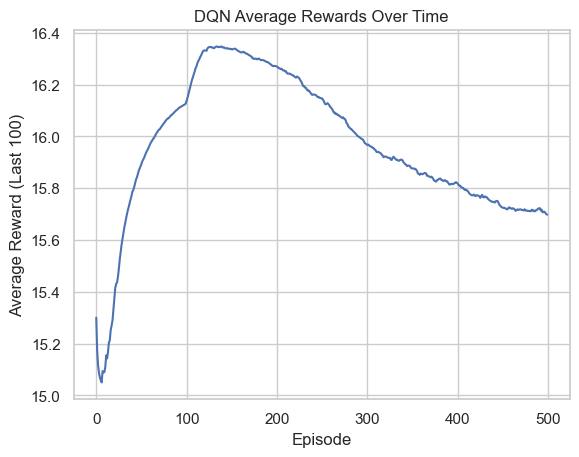

In [61]:
# Assuming ped_df is already loaded with a 'PED' column
env = PEDEnv(ped_df)

state_size = env.observation_space.shape[0]  # should be 1
action_size = env.action_space.n             # should be 5

agent = DQNAgent(state_size, action_size)

# Train the agent
rewards, avg_rewards = train_dqn(agent, env, n_episodes=500)

# Plot the reward progression
import matplotlib.pyplot as plt

plt.plot(avg_rewards)
plt.title("DQN Average Rewards Over Time")
plt.xlabel("Episode")
plt.ylabel("Average Reward (Last 100)")
plt.grid(True)
plt.show()


In [ ]:
df = pd.read_csv("dqn_price_predictions.csv")
df.head(10)


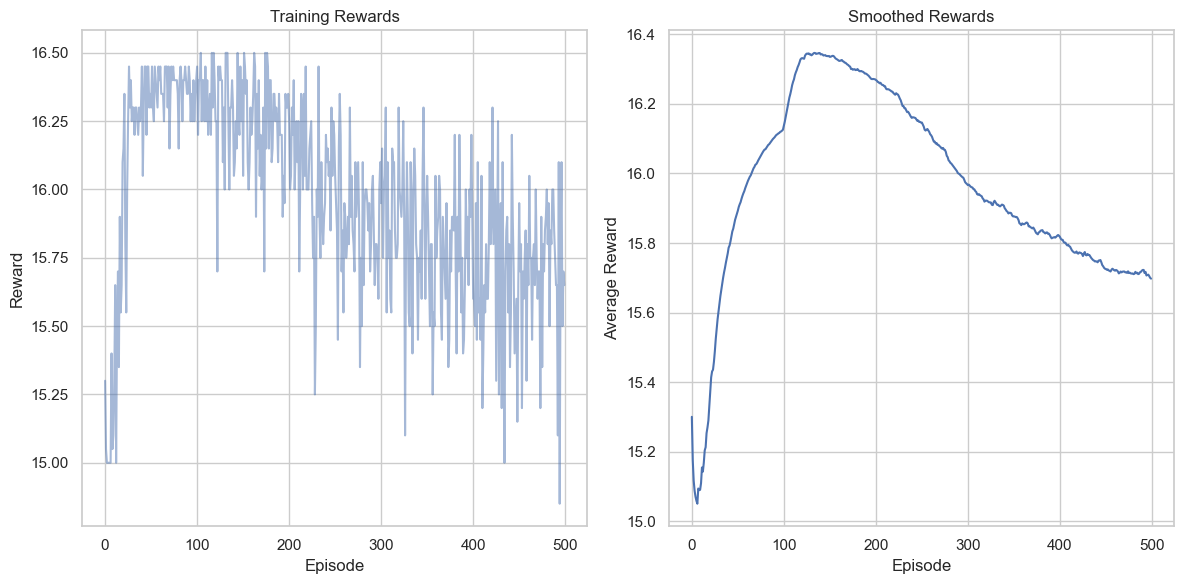

In [78]:

def plot_training_results(rewards, avg_rewards):
    plt.figure(figsize=(12, 6))
    
    # Plot raw rewards
    plt.subplot(1, 2, 1)
    plt.plot(rewards, alpha=0.5, label='Episode Reward')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Training Rewards')
    plt.grid(True)
    
    # Plot smoothed rewards
    plt.subplot(1, 2, 2)
    plt.plot(avg_rewards, label='100-episode Avg')
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.title('Smoothed Rewards')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Call this after training
plot_training_results(rewards, avg_rewards)

In [80]:
def test_agent(agent, env, n_episodes=10):
    all_rewards = []
    action_counts = np.zeros(env.action_space.n)
    
    for episode in range(n_episodes):
        state = env.reset()
        episode_reward = 0
        done = False
        
        while not done:
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            
            episode_reward += reward
            action_counts[action] += 1
            state = next_state
        
        all_rewards.append(episode_reward)
    
    return all_rewards, action_counts

def plot_test_results(test_rewards, action_counts):
    plt.figure(figsize=(12, 5))
    
    # Plot test rewards
    plt.subplot(1, 2, 1)
    plt.bar(range(len(test_rewards)), test_rewards)
    plt.xlabel('Test Episode')
    plt.ylabel('Total Reward')
    plt.title('Test Performance')
    plt.grid(True)
    
    # Plot action distribution
    plt.subplot(1, 2, 2)
    plt.bar(range(len(action_counts)), action_counts)
    plt.xlabel('Action')
    plt.ylabel('Count')
    plt.title('Action Distribution')
    plt.xticks(range(len(action_counts)), ['0.9x', '0.95x', '1.0x', '1.05x', '1.1x'])
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Test the trained agent
test_rewards, action_counts = test_agent(agent, env, n_episodes=20)
plot_test_results(test_rewards, action_counts)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x2 and 1x64)

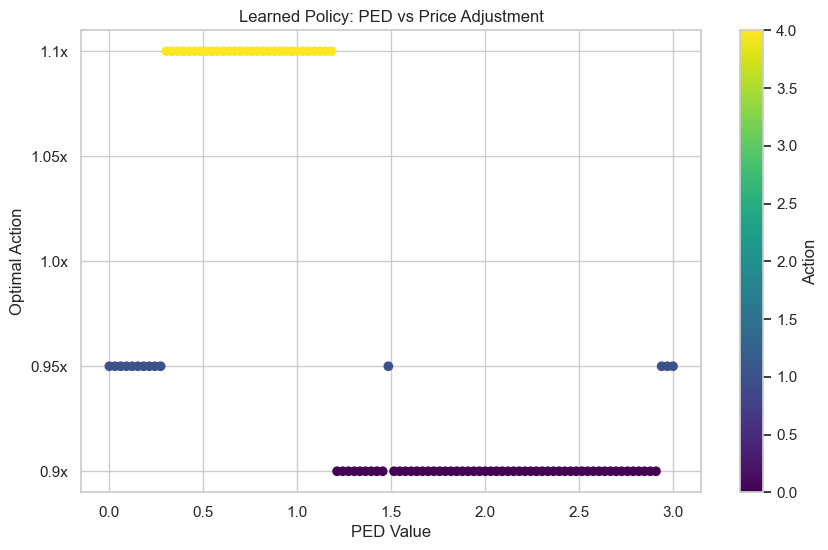

In [81]:
def plot_policy(agent):
    # Create range of PED values
    ped_values = np.linspace(0, 3, 100).reshape(-1, 1)
    
    # Get agent's action for each PED value
    with torch.no_grad():
        states = torch.FloatTensor(ped_values).to(agent.device)
        q_values = agent.qnetwork_local(states)
        actions = q_values.argmax(dim=1).cpu().numpy()
    
    # Plot policy
    plt.figure(figsize=(10, 6))
    plt.scatter(ped_values, actions, c=actions, cmap='viridis')
    plt.colorbar(label='Action')
    plt.yticks(range(5), ['0.9x', '0.95x', '1.0x', '1.05x', '1.1x'])
    plt.xlabel('PED Value')
    plt.ylabel('Optimal Action')
    plt.title('Learned Policy: PED vs Price Adjustment')
    plt.grid(True)
    plt.show()

plot_policy(agent)

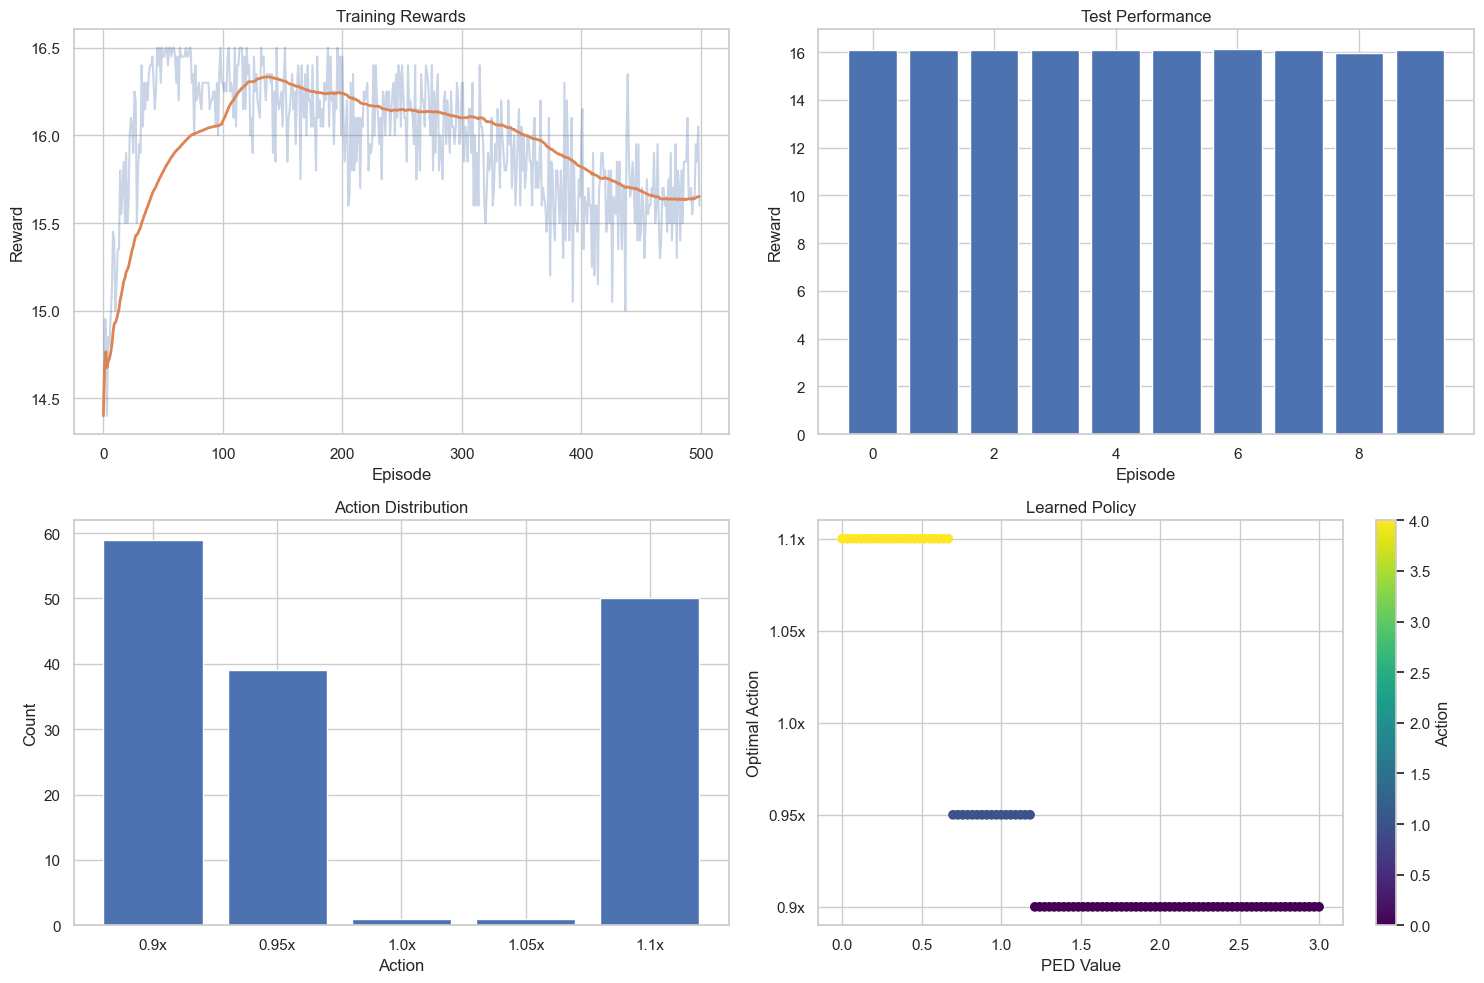

In [ ]:
def visualize_all_results(rewards, avg_rewards):
    # Create figure
    plt.figure(figsize=(15, 10))
    
    # Training rewards
    plt.subplot(2, 2, 1)
    plt.plot(rewards, alpha=0.3)
    plt.plot(avg_rewards, linewidth=2)
    plt.title('Training Rewards')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.grid(True)
    
    # Test performance
    test_rewards, action_counts = test_agent(agent, env)
    plt.subplot(2, 2, 2)
    plt.bar(range(len(test_rewards)), test_rewards)
    plt.title('Test Performance')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.grid(True)
    
    # Action distribution
    plt.subplot(2, 2, 3)
    plt.bar(['0.9x', '0.95x', '1.0x', '1.05x', '1.1x'], action_counts)
    plt.title('Action Distribution')
    plt.xlabel('Action')
    plt.ylabel('Count')
    plt.grid(True)
    
    # Policy visualization
    ped_values = np.linspace(0, 3, 100).reshape(-1, 1)
    with torch.no_grad():
        states = torch.FloatTensor(ped_values).to(agent.device)
        q_values = agent.qnetwork_local(states)
        actions = q_values.argmax(dim=1).cpu().numpy()
    
    plt.subplot(2, 2, 4)
    plt.scatter(ped_values, actions, c=actions, cmap='viridis')
    plt.colorbar(label='Action')
    plt.yticks(range(5), ['0.9x', '0.95x', '1.0x', '1.05x', '1.1x'])
    plt.xlabel('PED Value')
    plt.ylabel('Optimal Action')
    plt.title('Learned Policy')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Call this after training
visualize_all_results(rewards, avg_rewards)

In [82]:
df = pd.read_csv("dqn_price_predictions.csv")
df.head(5)


,Item_Type,Item_MRP,PED,Initial_Price,DQN_Action,DQN_New_Price,DQN_Price_Change (%)
0,Breads,140.952669,1.115376,140.952669,4,155.047935,10.0
1,Breakfast,141.788151,-7.066608,141.788151,2,141.788151,0.0
2,Canned,139.763832,-3.760684,139.763832,0,125.787449,-10.0
3,Dairy,148.499208,0.052832,148.499208,1,141.074247,-5.0
4,Frozen Foods,138.503366,0.663270,138.503366,4,152.353703,10.0


In [83]:

# Load necessary data
dqn_df = pd.read_csv("dqn_price_predictions.csv")
df = pd.read_csv("Grocery_Sales_Final.csv")

# Get average sales per Item_Type
avg_sales_df = df.groupby("Item_Type")["Item_Outlet_Sales"].mean().reset_index()
avg_sales_df.rename(columns={"Item_Outlet_Sales": "Avg_Outlet_Sales"}, inplace=True)

# Merge with DQN results
dqn_df = dqn_df.merge(avg_sales_df, on="Item_Type", how="left")

# Compute revenues
dqn_df["Original_Revenue"] = dqn_df["Initial_Price"] * dqn_df["Avg_Outlet_Sales"]
dqn_df["DQN_Revenue"] = dqn_df["DQN_New_Price"] * dqn_df["Avg_Outlet_Sales"]
dqn_df["Revenue_Change (%)"] = ((dqn_df["DQN_Revenue"] - dqn_df["Original_Revenue"]) / dqn_df["Original_Revenue"]) * 100

# Save comparison
dqn_df[[
    "Item_Type", "Initial_Price", "DQN_New_Price", "Avg_Outlet_Sales",
    "Original_Revenue", "DQN_Revenue", "Revenue_Change (%)"
]].to_csv("dqn_revenue_comparison.csv", index=False)

# Preview
print("✅ Revenue comparison saved to 'dqn_revenue_comparison.csv'")
print(dqn_df[[
    "Item_Type", "Initial_Price", "DQN_New_Price", "Original_Revenue", "DQN_Revenue", "Revenue_Change (%)"
]].head(10))


✅ Revenue comparison saved to 'dqn_revenue_comparison.csv'
               Item_Type  Initial_Price  DQN_New_Price  Original_Revenue  \
0                 Breads     140.952669     155.047935     310678.319080   
1              Breakfast     141.788151     141.788151     299429.443686   
2                 Canned     139.763832     125.787449     311001.766819   
3                  Dairy     148.499208     141.074247     331530.806653   
4           Frozen Foods     138.503366     152.353703     295409.361993   
5  Fruits and Vegetables     144.581235     130.123111     330947.832708   
6            Hard Drinks     137.077928     123.370135     293240.067615   
7     Health and Hygiene     130.818921     117.737029     262946.065413   
8              Household     149.424753     164.367229     337518.286563   
9                   Meat     139.882032     153.870236     302002.218192   

     DQN_Revenue  Revenue_Change (%)  
0  341746.150988                10.0  
1  299429.443686          

In [89]:
import pandas as pd

# Load required files
q_df = pd.read_csv("Final_RL_Pricing_Evaluation.csv")          # Q-learning results
dqn_df = pd.read_csv("dqn_price_predictions.csv")           # DQN results
final_df = pd.read_csv("Grocery_Sales_Final.csv")           # Original dataset

# Step 1: Calculate average outlet sales per Item_Type
avg_sales_df = final_df.groupby("Item_Type")["Item_Outlet_Sales"].mean().reset_index()
avg_sales_df.rename(columns={"Item_Outlet_Sales": "Avg_Outlet_Sales"}, inplace=True)

# Step 2: Merge sales data into Q-learning and DQN
q_df = q_df.merge(avg_sales_df, on="Item_Type", how="left")
dqn_df = dqn_df.merge(avg_sales_df, on="Item_Type", how="left")

# Step 3: Calculate revenue
q_df["Q_Revenue"] = q_df["New_Price"] * q_df["Avg_Outlet_Sales"]
dqn_df["DQN_Revenue"] = dqn_df["DQN_New_Price"] * dqn_df["Avg_Outlet_Sales"]
q_df["Original_Revenue"] = q_df["Initial_Price"] * q_df["Avg_Outlet_Sales"]

# Step 4: Assemble simplified comparison DataFrame
comparison_df = pd.DataFrame()
comparison_df["Item_Type"] = q_df["Item_Type"]
comparison_df["Initial_Price"] = q_df["Initial_Price"]
comparison_df["Q_Final_Price"] = q_df["New_Price"]
comparison_df["DQN_Price"] = dqn_df["DQN_New_Price"]
comparison_df["Avg_Outlet_Sales"] = q_df["Avg_Outlet_Sales"]
comparison_df["Original_Revenue"] = q_df["Original_Revenue"]
comparison_df["Q_Revenue"] = q_df["Q_Revenue"]
comparison_df["DQN_Revenue"] = dqn_df["DQN_Revenue"]

# Step 5: Add % changes
comparison_df["Q_Price_Change (%)"] = ((comparison_df["Q_Final_Price"] - comparison_df["Initial_Price"]) / comparison_df["Initial_Price"]) * 100
comparison_df["DQN_Price_Change (%)"] = ((comparison_df["DQN_Price"] - comparison_df["Initial_Price"]) / comparison_df["Initial_Price"]) * 100
comparison_df["Q_Revenue_Change (%)"] = ((comparison_df["Q_Revenue"] - comparison_df["Original_Revenue"]) / comparison_df["Original_Revenue"]) * 100
comparison_df["DQN_Revenue_Change (%)"] = ((comparison_df["DQN_Revenue"] - comparison_df["Original_Revenue"]) / comparison_df["Original_Revenue"]) * 100

# Step 6: Save
comparison_df.to_csv("Price_Revenue_Comparison_Q_vs_DQN.csv", index=False)

print("✅ Comparison saved to 'Price_Revenue_Comparison_Q_vs_DQN.csv'")
print(comparison_df.sort_values(by="DQN_Revenue_Change (%)", ascending=False).head(10))


✅ Comparison saved to 'Price_Revenue_Comparison_Q_vs_DQN.csv'
        Item_Type  Initial_Price  Q_Final_Price   DQN_Price  Avg_Outlet_Sales  \
12    Snack Foods     146.194934     161.179914  160.814427       2277.321739   
8       Household     149.424753     164.328938  164.367229       2258.784300   
0          Breads     140.952669     157.157375  155.047935       2204.132226   
9            Meat     139.882032     161.526110  153.870236       2158.977911   
4    Frozen Foods     138.503366     159.934122  152.353703       2132.867744   
13    Soft Drinks     131.492506     157.447447  144.641756       2006.511735   
1       Breakfast     141.788151      83.837924  141.788151       2111.808651   
3           Dairy     148.499208     163.720376  141.074247       2232.542597   
11        Seafood     141.841719     146.713714  134.749633       2326.065928   
14  Starchy Foods     147.838023     157.378501  140.446122       2374.332773   

    Original_Revenue      Q_Revenue    DQN_Rev

C:\Users\jasra\AppData\Local\Temp\ipykernel_11744\914647808.py:21: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\jasra\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


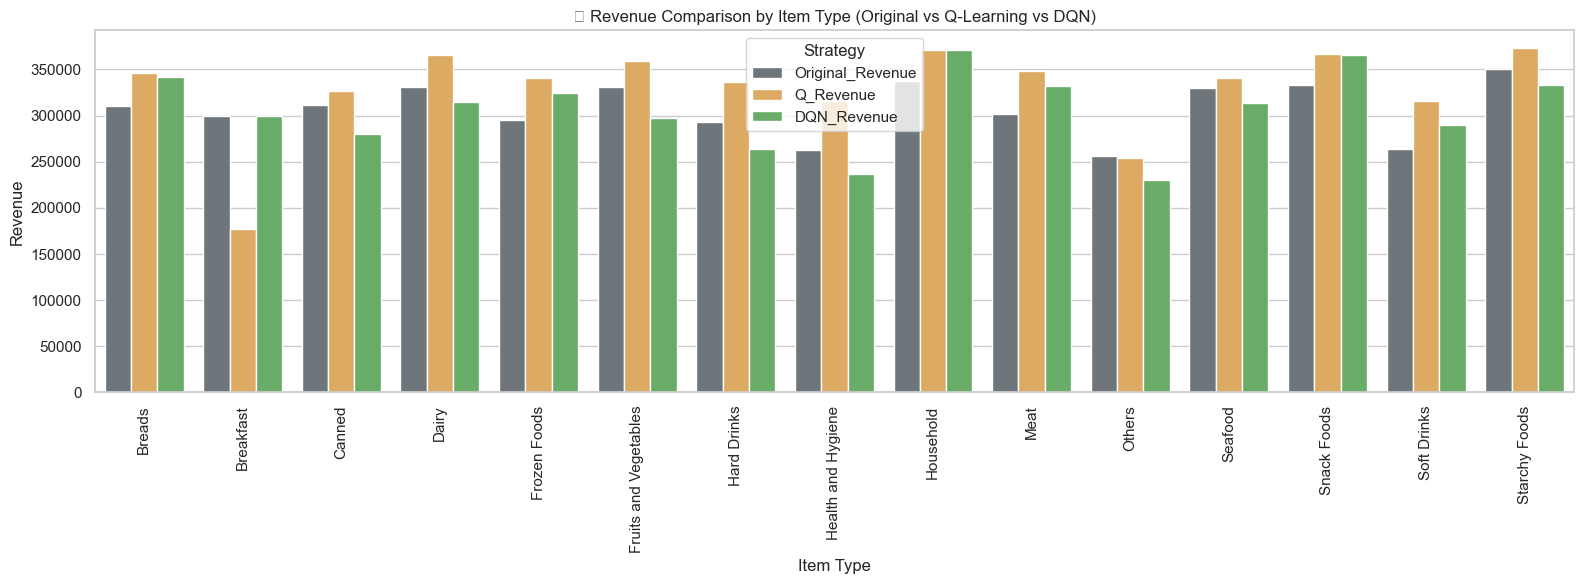

C:\Users\jasra\AppData\Local\Temp\ipykernel_11744\914647808.py:35: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\jasra\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


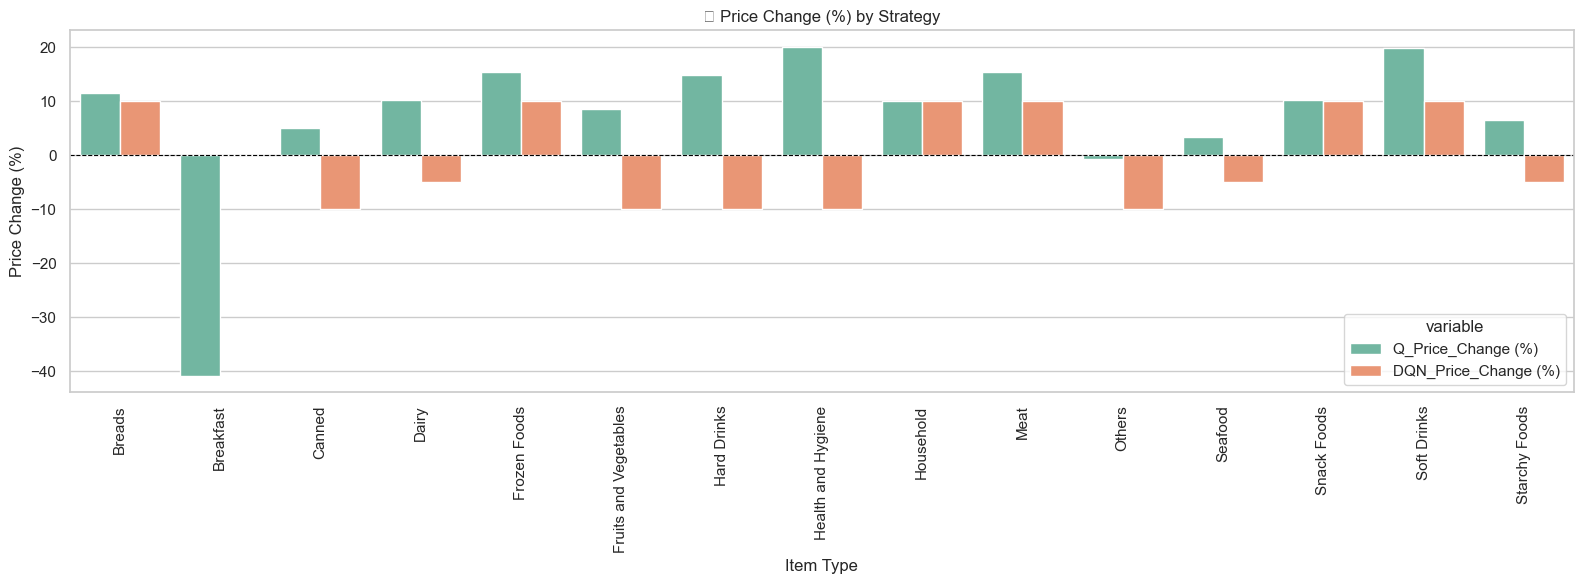

C:\Users\jasra\AppData\Local\Temp\ipykernel_11744\914647808.py:49: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\jasra\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


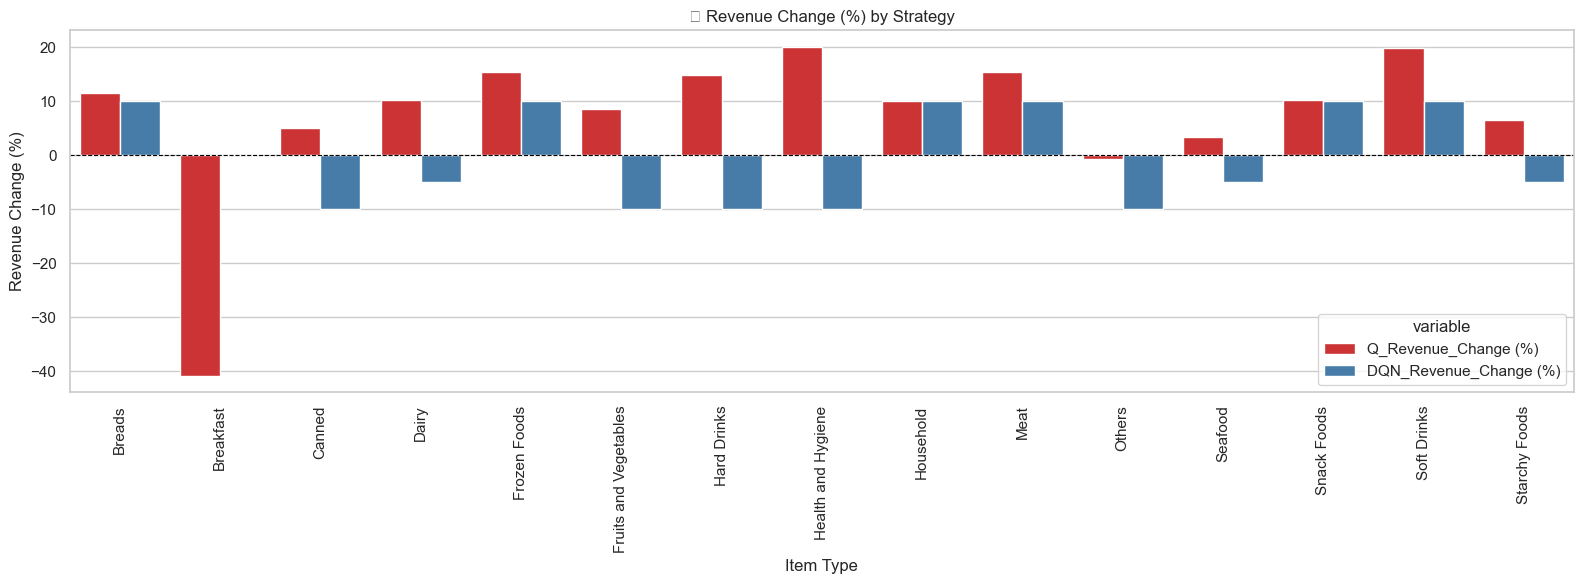

In [92]:

# Load data
comparison_df = pd.read_csv("Price_Revenue_Comparison_Q_vs_DQN.csv")

# Melt the DataFrame for easier plotting
melted_df = comparison_df[["Item_Type", "Original_Revenue", "Q_Revenue", "DQN_Revenue"]].melt(
    id_vars="Item_Type",
    value_vars=["Original_Revenue", "Q_Revenue", "DQN_Revenue"],
    var_name="Strategy",
    value_name="Revenue"
)

# Plot
plt.figure(figsize=(16, 6))
sns.barplot(data=melted_df, x="Item_Type", y="Revenue", hue="Strategy", palette=["#6c757d", "#f0ad4e", "#5cb85c"])

plt.title("💰 Revenue Comparison by Item Type (Original vs Q-Learning vs DQN)")
plt.xticks(rotation=90)
plt.xlabel("Item Type")
plt.ylabel("Revenue")
plt.legend(title="Strategy")
plt.tight_layout()
plt.show()


plt.figure(figsize=(16, 6))
sns.barplot(data=comparison_df.melt(id_vars="Item_Type", 
                                    value_vars=["Q_Price_Change (%)", "DQN_Price_Change (%)"]),
            x="Item_Type", y="value", hue="variable", palette="Set2")

plt.xticks(rotation=90)
plt.title("📉 Price Change (%) by Strategy")
plt.ylabel("Price Change (%)")
plt.xlabel("Item Type")
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()


plt.figure(figsize=(16, 6))
sns.barplot(data=comparison_df.melt(id_vars="Item_Type", 
                                    value_vars=["Q_Revenue_Change (%)", "DQN_Revenue_Change (%)"]),
            x="Item_Type", y="value", hue="variable", palette="Set1")

plt.xticks(rotation=90)
plt.title("📈 Revenue Change (%) by Strategy")
plt.ylabel("Revenue Change (%)")
plt.xlabel("Item Type")
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()


C:\Users\jasra\AppData\Local\Temp\ipykernel_11744\4048835147.py:17: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\jasra\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


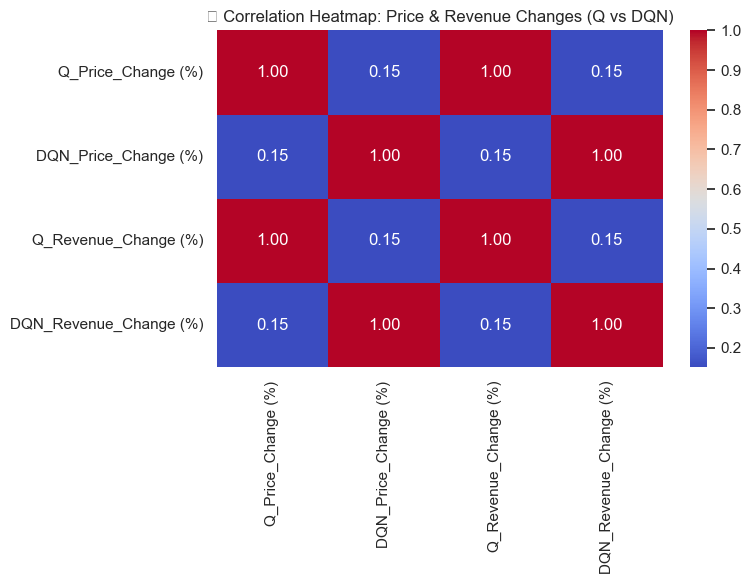

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the existing comparison dataframe
comparison_df = pd.read_csv("Price_Revenue_Comparison_Q_vs_DQN.csv")

# Select relevant columns
heat_df = comparison_df[[
    "Q_Price_Change (%)", "DQN_Price_Change (%)",
    "Q_Revenue_Change (%)", "DQN_Revenue_Change (%)"
]]

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heat_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔍 Correlation Heatmap: Price & Revenue Changes (Q vs DQN)")
plt.tight_layout()
plt.show()


C:\Users\jasra\AppData\Local\Temp\ipykernel_11744\1177253308.py:21: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\jasra\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


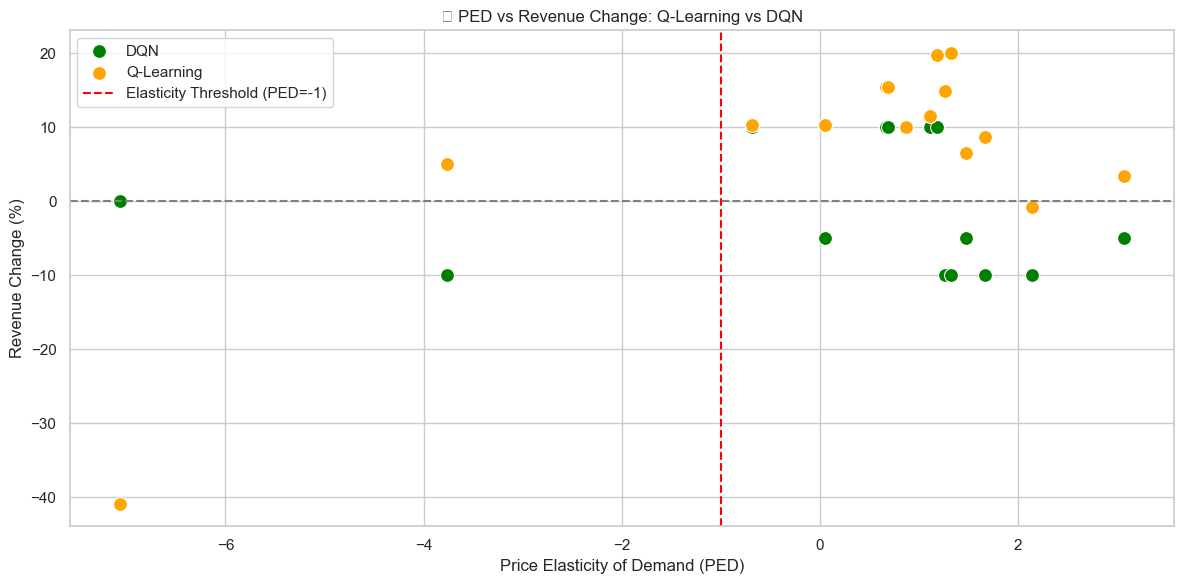

In [94]:
# Load PED values
ped_df = pd.read_csv("PED_Results.csv")

# Merge PED into the main comparison DataFrame
comparison_df = comparison_df.merge(ped_df[["Item_Type", "PED"]], on="Item_Type", how="left")

# Plot scatter plot for PED vs Revenue Change
plt.figure(figsize=(12, 6))

# DQN
sns.scatterplot(data=comparison_df, x="PED", y="DQN_Revenue_Change (%)", label="DQN", color='green', s=100)
# Q-Learning
sns.scatterplot(data=comparison_df, x="PED", y="Q_Revenue_Change (%)", label="Q-Learning", color='orange', s=100)

plt.axhline(0, linestyle='--', color='gray')
plt.axvline(-1, linestyle='--', color='red', label='Elasticity Threshold (PED=-1)')
plt.xlabel("Price Elasticity of Demand (PED)")
plt.ylabel("Revenue Change (%)")
plt.title("📉 PED vs Revenue Change: Q-Learning vs DQN")
plt.legend()
plt.tight_layout()
plt.show()


In [96]:
import pandas as pd

# Load comparison DataFrame
comparison_df = pd.read_csv("Price_Revenue_Comparison_Q_vs_DQN.csv")

# --- Top 5 Gainers ---
top_dqn_gainers = comparison_df.sort_values("DQN_Revenue_Change (%)", ascending=False).head(5)
top_q_gainers = comparison_df.sort_values("Q_Revenue_Change (%)", ascending=False).head(5)

# --- Top 5 Losers ---
top_dqn_losers = comparison_df.sort_values("DQN_Revenue_Change (%)", ascending=True).head(5)
top_q_losers = comparison_df.sort_values("Q_Revenue_Change (%)", ascending=True).head(5)

# --- Display Results ---
print("🔝 Top 5 DQN Revenue Gainers:")
print(top_dqn_gainers[["Item_Type", "Initial_Price", "DQN_Price", "DQN_Revenue", "DQN_Revenue_Change (%)"]])
print("\n🔝 Top 5 Q-Learning Revenue Gainers:")
print(top_q_gainers[["Item_Type", "Initial_Price", "Q_Final_Price", "Q_Revenue", "Q_Revenue_Change (%)"]])

print("\n📉 Bottom 5 DQN Revenue Losers:")
print(top_dqn_losers[["Item_Type", "Initial_Price", "DQN_Price", "DQN_Revenue", "DQN_Revenue_Change (%)"]])
print("\n📉 Bottom 5 Q-Learning Revenue Losers:")
print(top_q_losers[["Item_Type", "Initial_Price", "Q_Final_Price", "Q_Revenue", "Q_Revenue_Change (%)"]])


🔝 Top 5 DQN Revenue Gainers:
       Item_Type  Initial_Price   DQN_Price    DQN_Revenue  \
12   Snack Foods     146.194934  160.814427  366226.190655   
8      Household     149.424753  164.367229  371270.115219   
0         Breads     140.952669  155.047935  341746.150988   
9           Meat     139.882032  153.870236  332202.440011   
4   Frozen Foods     138.503366  152.353703  324950.298193   

    DQN_Revenue_Change (%)  
12                    10.0  
8                     10.0  
0                     10.0  
9                     10.0  
4                     10.0  

🔝 Top 5 Q-Learning Revenue Gainers:
             Item_Type  Initial_Price  Q_Final_Price      Q_Revenue  \
7   Health and Hygiene     130.818921     157.033489  315637.354508   
13         Soft Drinks     131.492506     157.447447  315920.150379   
9                 Meat     139.882032     161.526110  348731.304540   
4         Frozen Foods     138.503366     159.934122  341118.329521   
6          Hard Drinks     137.0

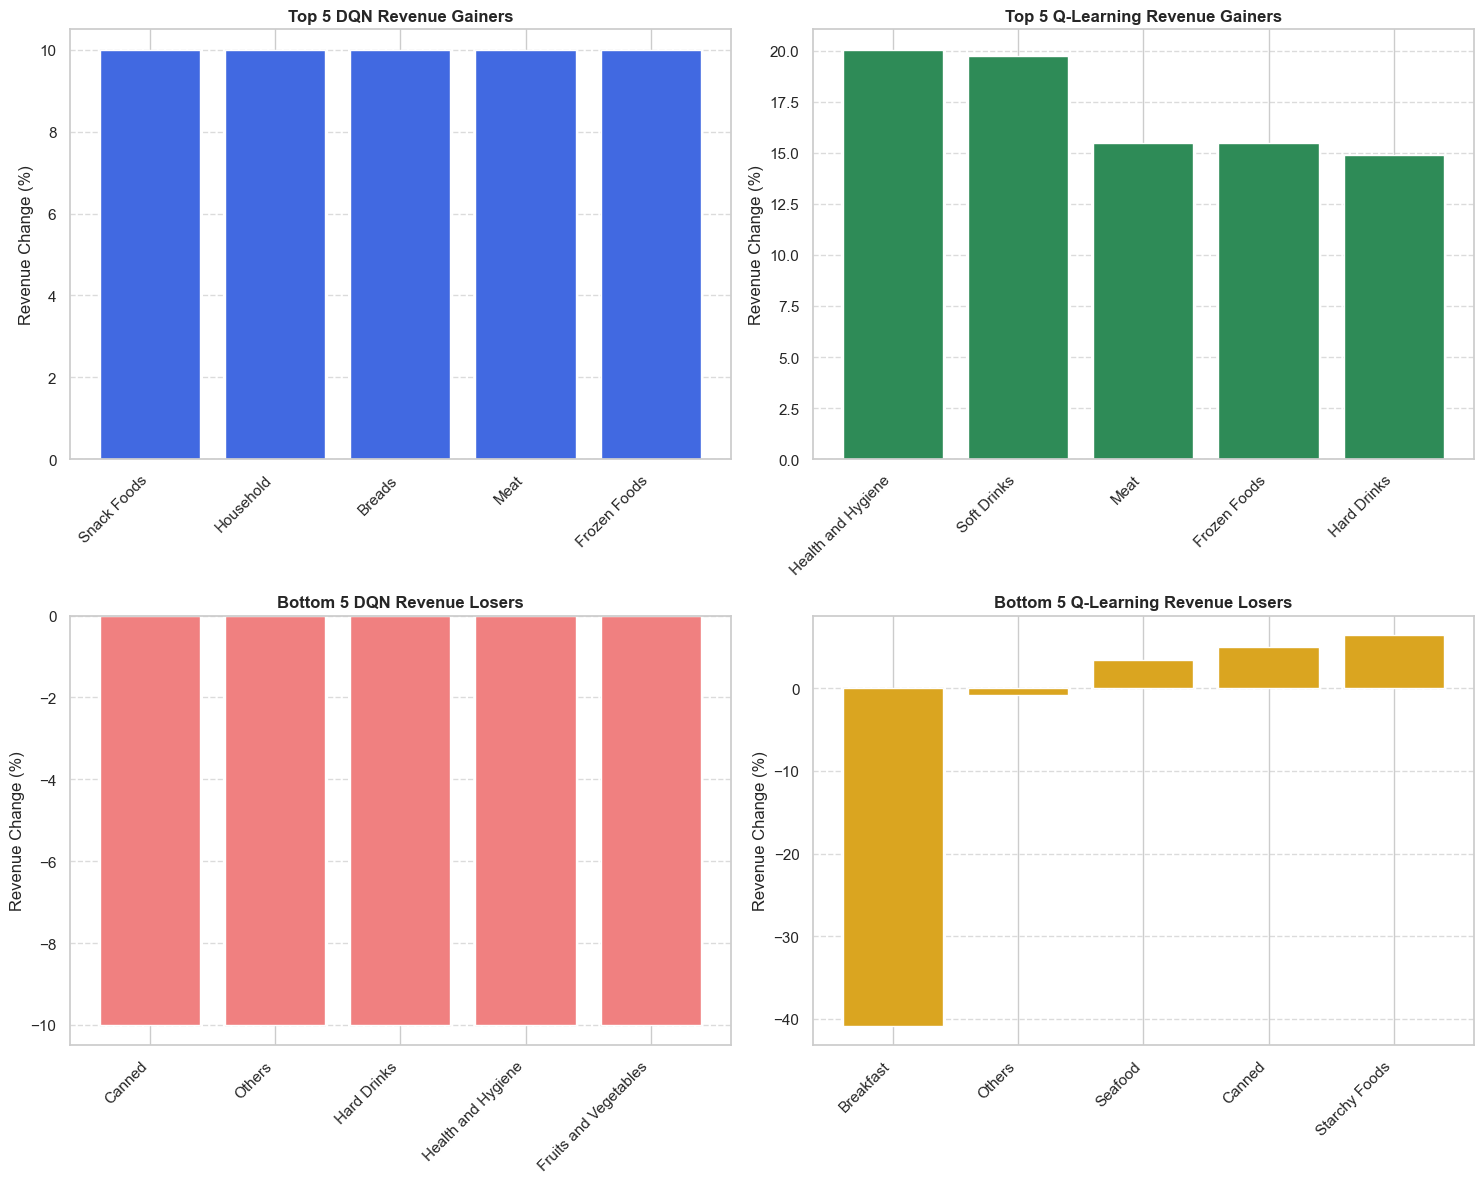

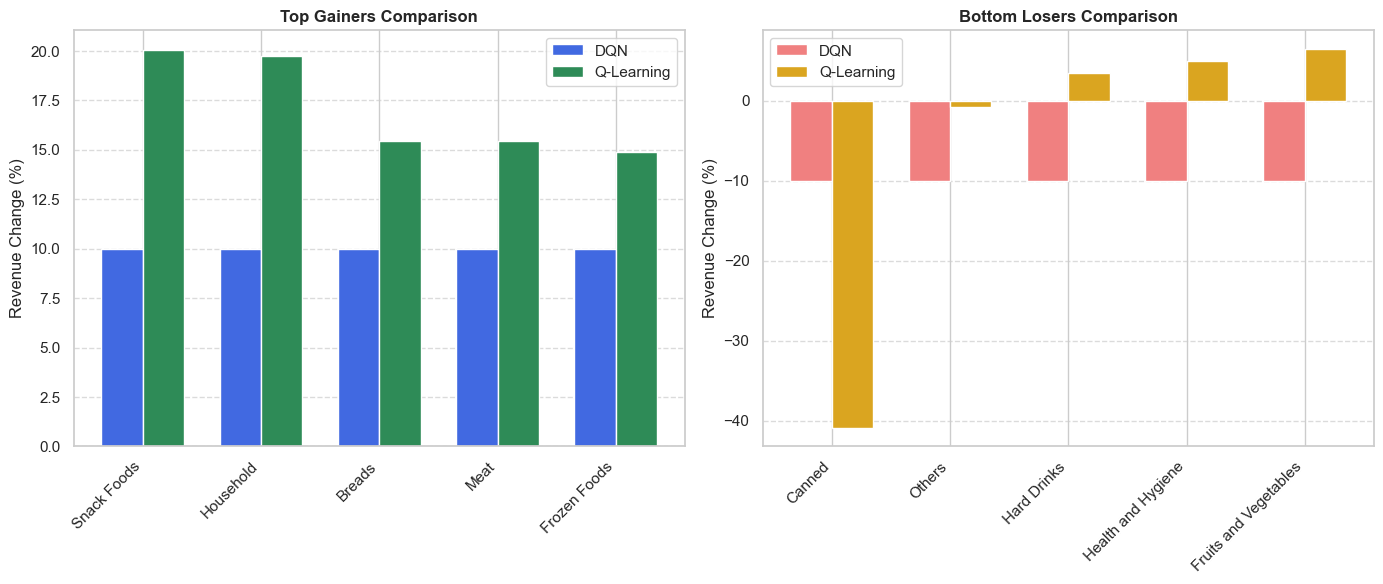

In [97]:


# Load comparison DataFrame
comparison_df = pd.read_csv("Price_Revenue_Comparison_Q_vs_DQN.csv")

# --- Prepare Data ---
# Top 5 Gainers
top_dqn_gainers = comparison_df.sort_values("DQN_Revenue_Change (%)", ascending=False).head(5)
top_q_gainers = comparison_df.sort_values("Q_Revenue_Change (%)", ascending=False).head(5)

# Top 5 Losers
top_dqn_losers = comparison_df.sort_values("DQN_Revenue_Change (%)", ascending=True).head(5)
top_q_losers = comparison_df.sort_values("Q_Revenue_Change (%)", ascending=True).head(5)

# --- Create Visualizations ---
plt.figure(figsize=(15, 12))

# 1. Top Gainers Comparison
plt.subplot(2, 2, 1)
plt.bar(top_dqn_gainers['Item_Type'], top_dqn_gainers['DQN_Revenue_Change (%)'], color='royalblue')
plt.title('Top 5 DQN Revenue Gainers', fontweight='bold')
plt.ylabel('Revenue Change (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 2, 2)
plt.bar(top_q_gainers['Item_Type'], top_q_gainers['Q_Revenue_Change (%)'], color='seagreen')
plt.title('Top 5 Q-Learning Revenue Gainers', fontweight='bold')
plt.ylabel('Revenue Change (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 2. Bottom Losers Comparison
plt.subplot(2, 2, 3)
plt.bar(top_dqn_losers['Item_Type'], top_dqn_losers['DQN_Revenue_Change (%)'], color='lightcoral')
plt.title('Bottom 5 DQN Revenue Losers', fontweight='bold')
plt.ylabel('Revenue Change (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 2, 4)
plt.bar(top_q_losers['Item_Type'], top_q_losers['Q_Revenue_Change (%)'], color='goldenrod')
plt.title('Bottom 5 Q-Learning Revenue Losers', fontweight='bold')
plt.ylabel('Revenue Change (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# --- Alternative: Side-by-Single Comparison ---
plt.figure(figsize=(14, 6))

# Combine top gainers
plt.subplot(1, 2, 1)
width = 0.35
x = range(len(top_dqn_gainers))
plt.bar(x, top_dqn_gainers['DQN_Revenue_Change (%)'], width, label='DQN', color='royalblue')
plt.bar([i + width for i in x], top_q_gainers['Q_Revenue_Change (%)'], width, label='Q-Learning', color='seagreen')
plt.xticks([i + width/2 for i in x], top_dqn_gainers['Item_Type'], rotation=45, ha='right')
plt.title('Top Gainers Comparison', fontweight='bold')
plt.ylabel('Revenue Change (%)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Combine bottom losers
plt.subplot(1, 2, 2)
plt.bar(x, top_dqn_losers['DQN_Revenue_Change (%)'], width, label='DQN', color='lightcoral')
plt.bar([i + width for i in x], top_q_losers['Q_Revenue_Change (%)'], width, label='Q-Learning', color='goldenrod')
plt.xticks([i + width/2 for i in x], top_dqn_losers['Item_Type'], rotation=45, ha='right')
plt.title('Bottom Losers Comparison', fontweight='bold')
plt.ylabel('Revenue Change (%)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\jasra\AppData\Local\Temp\ipykernel_24988\201021713.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_q_gainers, x="Item_Type", y="Q_Revenue_Change (%)",
C:\Users\jasra\AppData\Local\Temp\ipykernel_24988\201021713.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_q_losers, x="Item_Type", y="Q_Revenue_Change (%)",
C:\Users\jasra\AppData\Local\Temp\ipykernel_24988\201021713.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_dqn_gainers, x="Item_Type", y="DQN_Revenue_Change (%)",
C:\Users\jasra\AppData

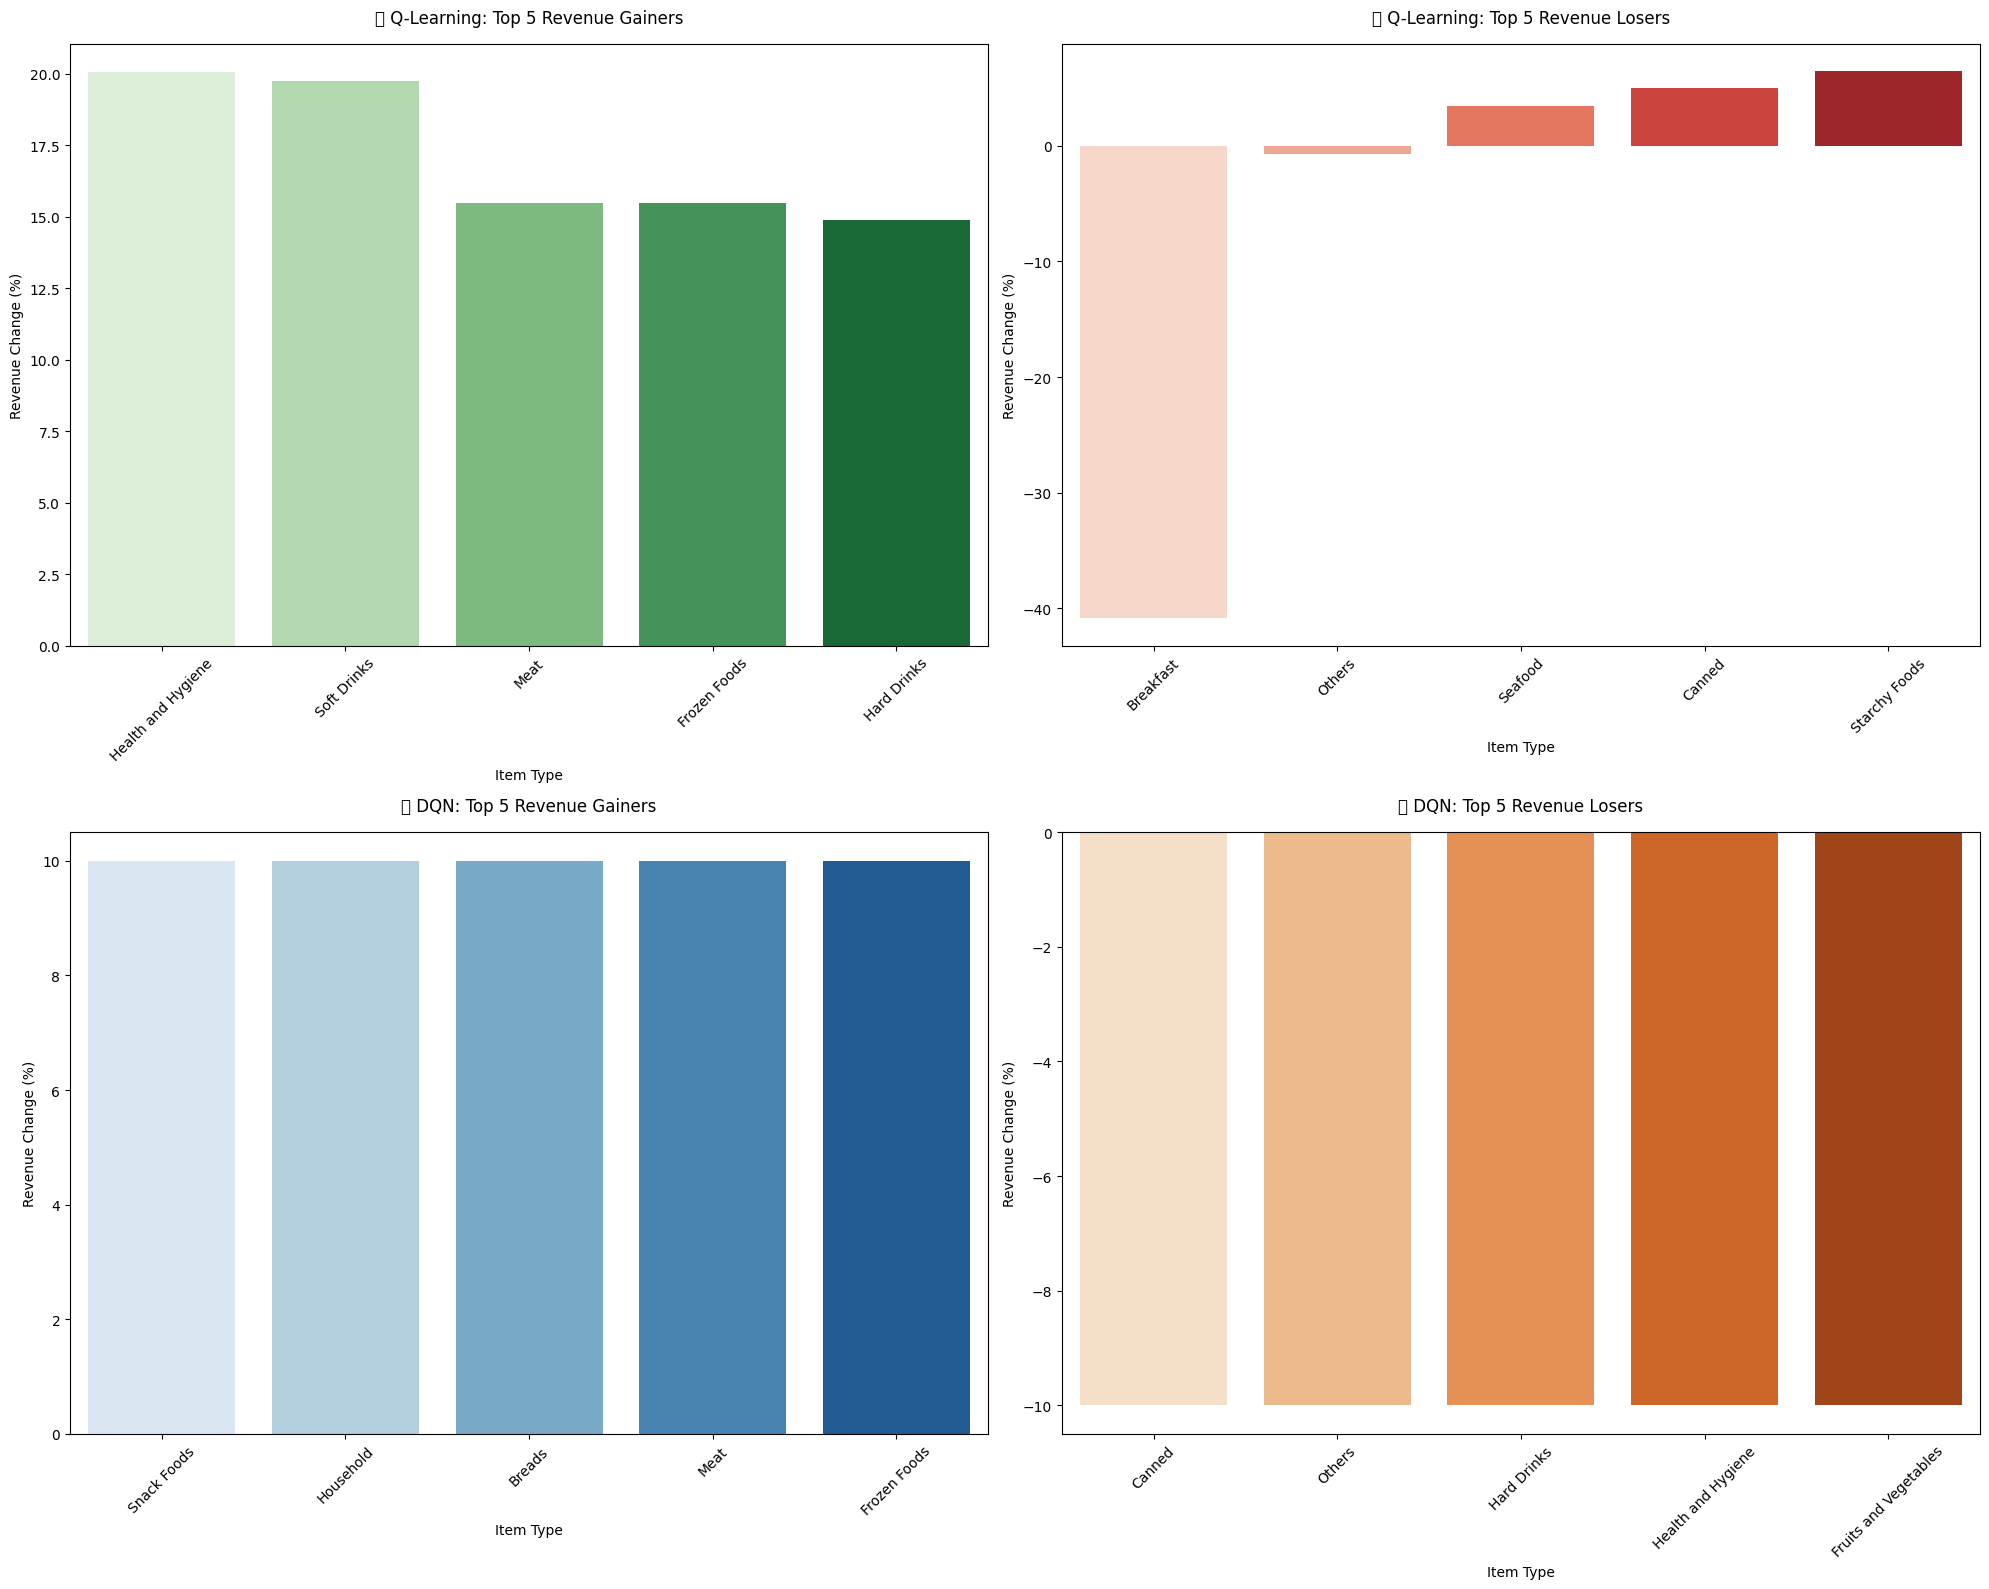

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
comparison_df = pd.read_csv("Price_Revenue_Comparison_Q_vs_DQN.csv")

# Sort and select Top 5 gainers & losers for Q-Learning
top_q_gainers = comparison_df.sort_values("Q_Revenue_Change (%)", ascending=False).head(5)
top_q_losers = comparison_df.sort_values("Q_Revenue_Change (%)", ascending=True).head(5)

# Sort and select Top 5 gainers & losers for DQN
top_dqn_gainers = comparison_df.sort_values("DQN_Revenue_Change (%)", ascending=False).head(5)
top_dqn_losers = comparison_df.sort_values("DQN_Revenue_Change (%)", ascending=True).head(5)

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Q-Learning Gainers
sns.barplot(data=top_q_gainers, x="Item_Type", y="Q_Revenue_Change (%)", 
            palette="Greens", ax=axes[0,0])
axes[0,0].set_title("🔶 Q-Learning: Top 5 Revenue Gainers", pad=15, fontsize=12)
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].set_ylabel("Revenue Change (%)")
axes[0,0].set_xlabel("Item Type")

# Q-Learning Losers
sns.barplot(data=top_q_losers, x="Item_Type", y="Q_Revenue_Change (%)", 
            palette="Reds", ax=axes[0,1])
axes[0,1].set_title("🔻 Q-Learning: Top 5 Revenue Losers", pad=15, fontsize=12)
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_ylabel("Revenue Change (%)")
axes[0,1].set_xlabel("Item Type")

# DQN Gainers
sns.barplot(data=top_dqn_gainers, x="Item_Type", y="DQN_Revenue_Change (%)", 
            palette="Blues", ax=axes[1,0])
axes[1,0].set_title("🟩 DQN: Top 5 Revenue Gainers", pad=15, fontsize=12)
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].set_ylabel("Revenue Change (%)")
axes[1,0].set_xlabel("Item Type")

# DQN Losers
sns.barplot(data=top_dqn_losers, x="Item_Type", y="DQN_Revenue_Change (%)", 
            palette="Oranges", ax=axes[1,1])
axes[1,1].set_title("🔻 DQN: Top 5 Revenue Losers", pad=15, fontsize=12)
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].set_ylabel("Revenue Change (%)")
axes[1,1].set_xlabel("Item Type")


# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
df = pd.read_csv("dqn_price_predictions.csv")
df.head(10)


,Item_Type,Item_MRP,PED,Initial_Price,DQN_Action,DQN_New_Price,DQN_Price_Change (%)
0,Breads,140.952669,1.115376,140.952669,4,155.047935,10.0
1,Breakfast,141.788151,-7.066608,141.788151,2,141.788151,0.0
2,Canned,139.763832,-3.760684,139.763832,0,125.787449,-10.0
3,Dairy,148.499208,0.052832,148.499208,1,141.074247,-5.0
4,Frozen Foods,138.503366,0.663270,138.503366,4,152.353703,10.0
5,Fruits and Vegetables,144.581235,1.668263,144.581235,0,130.123111,-10.0
6,Hard Drinks,137.077928,1.260923,137.077928,0,123.370135,-10.0
7,Health and Hygiene,130.818921,1.322941,130.818921,0,117.737029,-10.0
8,Household,149.424753,0.870258,149.424753,4,164.367229,10.0
9,Meat,139.882032,0.691885,139.882032,4,153.870236,10.0


In [91]:
# Step 7: Compare Revenue between Q-Learning and DQN
comparison_df["Revenue_Diff (DQN - Q)"] = comparison_df["DQN_Revenue"] - comparison_df["Q_Revenue"]
comparison_df["Revenue_Diff (%)"] = ((comparison_df["DQN_Revenue"] - comparison_df["Q_Revenue"]) / comparison_df["Q_Revenue"]) * 100

# Total revenue across all item types
total_original_revenue = comparison_df["Original_Revenue"].sum()
total_q_revenue = comparison_df["Q_Revenue"].sum()
total_dqn_revenue = comparison_df["DQN_Revenue"].sum()

total_change_q = total_q_revenue - total_original_revenue
total_change_dqn = total_dqn_revenue - total_original_revenue
delta_dqn_vs_q = total_dqn_revenue - total_q_revenue

print("\n📊 Total Revenue Summary")
print(f"🧾 Original Revenue: ₹{total_original_revenue:,.2f}")
print(f"🤖 Q-Learning Revenue: ₹{total_q_revenue:,.2f} ({total_change_q:+,.2f} change)")
print(f"🧠 DQN Revenue: ₹{total_dqn_revenue:,.2f} ({total_change_dqn:+,.2f} change)")
print(f"🔁 Revenue Difference (DQN - Q): ₹{delta_dqn_vs_q:+,.2f}")



📊 Total Revenue Summary
🧾 Original Revenue: ₹4,608,318.59
🤖 Q-Learning Revenue: ₹4,940,423.33 (+332,104.74 change)
🧠 DQN Revenue: ₹4,596,530.18 (-11,788.41 change)
🔁 Revenue Difference (DQN - Q): ₹-343,893.16
